In [114]:
import csv
from lxml import etree as et
from math import sin, cos, sqrt, atan2, radians
import matplotlib.pyplot as plt
import networkx as nx
from random import random, sample
import numpy as np
import osmnx as ox
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from functools import reduce
from itertools import count
import osmnx as ox
from heapq import heappush, heappop

In [2]:
# osm_file='data/graph.osm'
# f = open('data/orig_houses.txt', 'r')
# houses_id = [house[:-1] for house in f.readlines()]
# f.close()
# f = open('data/orig_med.txt', 'r')
# med_id = [med[:-1] for med in f.readlines()]   
# f.close()

# G = nx.DiGraph()
# context = et.iterparse(osm_file, events=('end',), tag='node')
# nodes = {}
# for event, elem in context:
#     #Поменял lon и lat местами для разворота
#     nodes[elem.get('id')] = [float(elem.get('lon')),float(elem.get('lat'))]
#     elem.clear()
#     while elem.getprevious() is not None:
#         del elem.getparent()[0]
# del context
# G.add_nodes_from(nodes)

# def distance(node1,node2):
#     R = 6373.0
#     lat1 = radians(nodes[node1][1])#lat
#     lon1 = radians(nodes[node1][0])#lon
#     lat2 = radians(nodes[node2][1])
#     lon2 = radians(nodes[node2][0])

#     dlon = lon2 - lon1
#     dlat = lat2 - lat1

#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))

#     distance = R * c
#     return distance

# def nearest_node_id(node_a_id, pass_list = []):    
#     min_dist = float('inf')
#     if pass_list.count(node_a_id) == 0:
#         pass_list.append(node_a_id)
#     for node_b_id in list(G.nodes()):
#         d = distance(node_a_id,node_b_id)
#         if d < min_dist and node_b_id not in pass_list:
#             min_dist = d
#             nni = node_b_id
#     return nni

# context = et.iterparse(osm_file,events=('end',),tag='way')
# edges = []
# for event, elem in context:
#     oneway = 0
#     #Определим свойства
#     for child in elem.iterchildren('tag'):
#         key = child.get('k')      
#         #Возможно, дорога односторонняя
#         if key == 'oneway' and child.get('v') == 'yes':
#             oneway = 1
#     #Узнаем, какие вершины состоят в пути
#     nodes_list = []
#     for child in elem.iterchildren('nd'):
#         _id = child.get('ref')
#         nodes_list.append(_id)
#     #Добавляем ребра с весами в список смежности
#     if False:#oneway == 1:
#         for i in range(len(nodes_list)-1):
#             #Добавляем вершины
#             from_node, to_node = nodes_list[i:i+2]
#             d = distance(from_node, to_node)
#             edges.append((from_node, to_node, {'weight': d}))
#     else:
#         for i in range(len(nodes_list)-1):
#             from_node, to_node = nodes_list[i:i+2]
#             d = distance(from_node, to_node)
#             edges.append((from_node, to_node, {'weight': d}))
#             edges.append((to_node, from_node, {'weight': d}))
#     elem.clear()
#     while elem.getprevious() is not None:
#         del elem.getparent()[0]
# del context
# G.add_edges_from(edges)    

# #Удалим лишнее
# for node in nodes:
#     if (len(list(G.successors(node))) == 1 or len(list(G.predecessors(node)))) == 1 and G.degree(node) != 1:
#         remove_list,add_list = [],[]
#         for from_node in G.predecessors(node):
#             for to_node in G.successors(node):
#                 remove_list.append((from_node,node))
#                 remove_list.append((node,to_node))
#                 add_list.append((from_node, to_node, {'weight':G[from_node][node]['weight']+G[node][to_node]['weight']}))
#         G.add_edges_from(add_list)
#         G.remove_edges_from(remove_list)
#         G.remove_node(node)

# remove_nodes = [node for node in G.nodes() if int(G.degree(node)) == 0]


# nearest_node_id_for_house,nearest_node_id_for_med = set(),set()
# for h_id in houses_id:
#     nni = nearest_node_id(h_id,remove_nodes)
#     nearest_node_id_for_house.add(nni)

# for m_id in med_id:
#     nni = nearest_node_id(m_id,remove_nodes)
#     nearest_node_id_for_med.add(nni) 

# with open('data/houses.txt','w',newline='') as f:      
#     s = '\n'.join(list(nearest_node_id_for_house))
#     f.write(s+' ')
    
# with open('data/med.txt','w',newline='') as f:      
#     s = '\n'.join(list(nearest_node_id_for_med))
#     f.write(s+' ')

In [3]:
def create_graph_from_osm(osm_file='orig_graph.osm'): 
    f = open('houses.txt', 'r')
    houses_id = [house[:-1] for house in f.readlines()]
    f.close()
    f = open('med.txt', 'r')
    med_id = [med[:-1] for med in f.readlines()]   
    f.close()

    G = nx.DiGraph()
    context = et.iterparse(osm_file, events=('end',), tag='node')
    nodes = {}
    for event, elem in context:
        #Поменял lon и lat местами для разворота
        nodes[elem.get('id')] = [float(elem.get('lon')),float(elem.get('lat'))]
        elem.clear()
        while elem.getprevious() is not None:
            del elem.getparent()[0]
    del context
    G.add_nodes_from(nodes)
    
    def distance(node1,node2):
        R = 6373.0
        lat1 = radians(nodes[node1][1])#lat
        lon1 = radians(nodes[node1][0])#lon
        lat2 = radians(nodes[node2][1])
        lon2 = radians(nodes[node2][0])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        return distance

    def nearest_node_id(node_a_id, pass_list = []):    
        min_dist = float('inf')
        if pass_list.count(node_a_id) == 0:
            pass_list.append(node_a_id)
        for node_b_id in list(G.nodes()):
            d = distance(node_a_id,node_b_id)
            if d < min_dist and node_b_id not in pass_list:
                min_dist = d
                nni = node_b_id
        return nni
   
    context = et.iterparse(osm_file,events=('end',),tag='way')
    edges = []
    for event, elem in context:
        oneway = 0
        #Определим свойства
        for child in elem.iterchildren('tag'):
            key = child.get('k')      
            #Возможно, дорога односторонняя
            if key == 'oneway' and child.get('v') == 'yes':
                oneway = 1
        #Узнаем, какие вершины состоят в пути
        nodes_list = []
        for child in elem.iterchildren('nd'):
            _id = child.get('ref')
            nodes_list.append(_id)
        #Добавляем ребра с весами в список смежности
        if False:#oneway == 1:
            for i in range(len(nodes_list)-1):
                #Добавляем вершины
                from_node, to_node = nodes_list[i:i+2]
                d = distance(from_node, to_node)
                edges.append((from_node, to_node, {'weight': d}))
        else:
            for i in range(len(nodes_list)-1):
                from_node, to_node = nodes_list[i:i+2]
                d = distance(from_node, to_node)
                edges.append((from_node, to_node, {'weight': d}))
                edges.append((to_node, from_node, {'weight': d}))
        elem.clear()
        while elem.getprevious() is not None:
            del elem.getparent()[0]
    del context
    G.add_edges_from(edges)    
    
    #Удалим лишнее
    for node in nodes:
        if (len(list(G.successors(node))) == 1 or len(list(G.predecessors(node)))) == 1 and G.degree(node) != 1:
            remove_list,add_list = [],[]
            for from_node in G.predecessors(node):
                for to_node in G.successors(node):
                    remove_list.append((from_node,node))
                    remove_list.append((node,to_node))
                    add_list.append((from_node, to_node, {'weight':G[from_node][node]['weight']+G[node][to_node]['weight']}))
            G.add_edges_from(add_list)
            G.remove_edges_from(remove_list)
            G.remove_node(node)
    
    remove_nodes = [node for node in G.nodes() if int(G.degree(node)) == 0]
    
    for h_id in houses_id:
        w = 1 + random()
        for node in G.successors(h_id):
            G[h_id][node]['weight'] *= w
        for node in G.predecessors(h_id):
            G[node][h_id]['weight'] *= w
        
    for m_id in med_id:
        w = 1 + random()
        for node in G.successors(m_id):
            G[m_id][node]['weight'] *= w
        for node in G.predecessors(m_id):
            G[node][m_id]['weight'] *= w    
    
    G.remove_nodes_from(remove_nodes)
#     houses_id = houses_id[0:100]   
#     med_id = med_id[0:10]
    return G,houses_id,med_id,nodes

In [4]:
# def create_graph_from_osm(osm_file='data/graph.osm'):        
#     f = open('data/additional_nodes.txt', 'r')
#     additional_nodes_id = [node[:-1] for node in f.readlines()]
#     f.close()
    
#     #В целом можно без этого достать веса и убрать G_ox  c nodes_info
#     G_ox = ox.core.graph_from_file(osm_file,  simplify=False, retain_all=True)
#     nodes_info = [[str(node) for node in G_ox.nodes], G_ox.nodes(data=True)]
    
#     def distance(node1,node2):
#         R = 6373.0
#         lon1 = radians(nodes_info[int(node1)]['x'])#lon
#         lat1 = radians(nodes_info[int(node1)]['y'])#lat
#         lon2 = radians(nodes_info[int(node2)]['x'])
#         lat2 = radians(nodes_info[int(node2)]['y'])

#         dlon = lon2 - lon1
#         dlat = lat2 - lat1

#         a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#         c = 2 * atan2(sqrt(a), sqrt(1 - a))

#         distance = R * c
#         return distance

#     def nearest_node_id(node_a_id, pass_list = []):    
#         min_dist = float('inf')
#         if pass_list.count(node_a_id) == 0:
#             pass_list.append(node_a_id)
#         for node_b_id in nodes_info[0]:
#             d = distance(node_a_id,node_b_id)
#             if d < min_dist and node_b_id not in pass_list:
#                 min_dist = d
#                 nni = node_b_id
#         return nni
    
#     G = nx.DiGraph(G_ox)
    
#     f = open('100houses.txt', 'r')
#     houses_id = [house[:-1] for house in f.readlines()]
#     f.close()
#     f = open('10med.txt', 'r')
#     med_id = [med[:-1] for med in f.readlines()]
#     f.close()
    
#     nearest_node_id_for_house,nearest_node_id_for_med = [],[]
#     for h_id in houses_id:
#         #И тут
#         nni = nearest_node_id(h_id,additional_nodes_id)
#         w = 1 + random()
#         nearest_node_id_for_house.append(nni)
#         for node in G.successors(nni):
#             G[nni][node]['weight'] *= w
#         for node in G.predecessors(nni):
#             G[node][nni]['weight'] *= w
            
#     for m_id in med_id:
#         #И тут
#         nni = nearest_node_id(m_id,additional_nodes_id)
#         w = 1 + random()
#         nearest_node_id_for_med.append(nni)
#         for node in G.successors(nni):
#             G[nni][node]['weight'] *= w
#         for node in G.predecessors(nni):
#             G[node][nni]['weight'] *= w

            
#     houses_id = nearest_node_id_for_house.copy()
#     med_id = nearest_node_id_for_med.copy()
    
#     return G,houses_id,med_id


In [169]:
class MinNodeHeap:

    def __init__(self,g={}):
        self.heap = []
        self.size = 0
        self.g = g

    def left_index(self,i):
        return 2*i+1

    def right_index(self,i):
        return 2*i+2

    def parent_index(self,i):
        return (i-1)//2

    def min_heapify(self,i):
        l = self.left_index(i)
        r = self.right_index(i)

        if l < self.size and self.g[self.heap[l]]['weight'] < self.g[self.heap[i]]['weight']:
            smallest = l
        else:
            smallest = i
        if r < self.size and self.g[self.heap[r]]['weight'] < self.g[self.heap[smallest]]['weight']:
            smallest = r
        if smallest != i:
            self.g[self.heap[i]]['index'], self.g[self.heap[smallest]]['index'] = self.g[self.heap[smallest]]['index'], self.g[self.heap[i]]['index']           
            self.heap[i], self.heap[smallest] = self.heap[smallest], self.heap[i]
            self.min_heapify(smallest)

    def build_min_heap(self,_NodeView):
        self.heap = [None for i in range(len(_NodeView))]
        for elem in self.g:
            self.heap[self.g[elem]['index']] = elem
#         self.heap = list(_NodeView)
        self.size = len(_NodeView)
#         for i in range(len(_NodeView)//2,-1,-1):
#             self.min_heapify(i)
            
    def extract_min(self):
        if self.size < 1:
            return None
        _min = self.heap[0]
        self.g[self.heap[self.size-1]]['index'] = self.g[self.heap[0]]['index']
        self.heap[0] = self.heap[self.size-1]      
        self.size -= 1
        self.min_heapify(0)
        return _min
    
    def decrease_key(self,_id,key):
        i = self.g[_id]['index']
        if key > self.g[_id]['weight']:
            raise KeyError
        self.g[_id]['weight'] = key
        while (i > 0) and (self.g[self.heap[self.parent_index(i)]]['weight'] > self.g[self.heap[i]]['weight']):
            self.g[self.heap[self.parent_index(i)]]['index'], self.g[self.heap[i]]['index'] = self.g[self.heap[i]]['index'], self.g[self.heap[self.parent_index(i)]]['index']
            self.heap[self.parent_index(i)], self.heap[i] = self.heap[i], self.heap[self.parent_index(i)]
            i = self.parent_index(i)

            
def initialize_single_sourse(G,_from):
    g = {}
    nodes_list = list(G.nodes).copy()
    nodes_list.remove(_from)
    for v_id, i in zip(nodes_list,range(1,len(G.nodes))):
        g[v_id] = {'way': [], 'weight':float('inf'), 'index':i}
    g[_from] = {'way':[_from], 'weight':0, 'index':0}
    return g

def relax(G,min_heap,_from,_to):
    if min_heap.g[_to]['weight'] > min_heap.g[_from]['weight'] + G[_from][_to]['weight']:
        key = min_heap.g[_from]['weight'] + G[_from][_to]['weight']
        min_heap.decrease_key(_to,key)
        min_heap.g[_to]['way'] = (min_heap.g[_from]['way']).copy()
        min_heap.g[_to]['way'].append(_to)
  
# Старая дейкстра (работает)
# def dijkstra(G,_from,to_list = 'empty'):
#     if to_list == 'empty':
#         to_list = list(G.nodes)
#     g = initialize_single_sourse(G,_from)
#     finish = 0
#     nodes = MinNodeHeap(g)
#     nodes.build_min_heap(G.nodes)
#     while nodes.size > 0 and finish < len(to_list):
#         u = nodes.extract_min()
#         if to_list.count(u) > 0:
#             finish += 1
#         for v in G.successors(u):
#             relax(G,nodes,u,v)
#     return g


#Новая
def dijkstra(G,_from,to_list = 'empty', max_dist = None):
    if to_list == 'empty':
        to_list = list(G.nodes())
    
    checked_to_nodes = set()
    push, pop = heappush, heappop  
    c,target_count = count(),0
    finish = len(to_list)
    heap, checked = [], {}
    checked[_from] = {'weight':0,'way':[_from]}
    push(heap, (0, next(c), _from))
    
    while heap:
        (d, _, v) = pop(heap)
        if v in to_list:
            checked_to_nodes.add(v)
        if checked_to_nodes == set(to_list):
            break
        for u in G.successors(v):
            _weight = checked[v]['weight'] + G[v][u]['weight']
            if max_dist is not None:
                if vu_dist > max_dist:
                    continue
            if u not in checked:
                checked[u] = {'weight': _weight, 'way': checked[v]['way'] + [u]}
                push(heap, (_weight, next(c), u))
            elif _weight < checked[u]['weight']:
                checked[u]['weight'] = _weight
                push(heap, (_weight, next(c), u))
                checked[u]['way'] = checked[v]['way'] + [u]

    return checked

In [6]:
def create_adj_list(filename = 'adj_list2.csv'):
    with open(filename,'w',newline='') as csv_file:
        csv_file.write('from_id to_id,edge_weight\n')
        for _from in list(G.nodes):
            s = str(_from)
            for _to in G.successors(_from):
                s = s + ' ' + str(_to) + ',' + str(G[_from][_to]['weight'])
            csv_file.write(s + '\n')

In [7]:
def write_dijkstra_csv(G,filename,from_list,to_list):
    with open(filename,'w',newline='') as f:
        f.write('from,to,way_weight,way\n')
        for _from in from_list:
            a = dijkstra(G,_from,to_list)
            a = {k:v for k,v in a.items() if v["weight"] != float('inf')}
            for _to in to_list:
                if _to in a.keys():
                    s = _from + ',' + _to + ',' + str(a[_to]['weight'])
                    way = ','.join(a[_to]['way'])
                    s = s + ',' + way
                    f.write(s + '\n')

def read_dijkstra_csv(filename):
    min_ways = {}         
    with open(filename,'r') as f:
        lines = f.readlines()
        lines = lines[1:] 
        for line in lines:
            split_line = line[:-1].split(',')
            _from = split_line[0]
            _to = split_line[1]
            weight = float(split_line[2])
            if weight != float('inf'):
                way = split_line[3:]
            else: 
                way = []             
            if min_ways.get(_from) == None:
                min_ways[_from] = {_to:{'weight':weight,'way':way}}
            else:
                min_ways[_from][_to] = {'weight':weight,'way':way}
                
    return min_ways
            


In [8]:
def write_ways(filename,min_way):
    with open(filename,'w',newline='') as f:  
        f.write('from_id,to_id,way_weight\n')
        s = ''
        for _from in min_way.keys():
            s = s + _from + ',' + min_way[_from]['to'] + ',' + str(min_way[_from]['weight'])+'\n'
        f.write(s)


In [9]:
def search_min_oneways(min_ways,from_list,to_list):
    min_way = {}
    for _from in from_list:
        for _to in to_list:
            if _from != _to:
                if _from in min_ways.keys() and _to in min_ways[_from].keys():
                    if min_way.get(_from) == None:
                        min_way[_from] = {'to':_to,'weight':min_ways[_from][_to]['weight'],'way':min_ways[_from][_to]['way']}
                    elif min_ways[_from][_to]['weight'] < min_way[_from]['weight']:
                        min_way[_from]['to'] = _to
                        min_way[_from]['weight'] = min_ways[_from][_to]['weight']                    
                        min_way[_from]['way'] =  min_ways[_from][_to]['way']
    return min_way


In [10]:
def search_min_ways_there_and_back(min_ways,from_list,to_list):
    min_way = {}
    for _from in from_list:
        for _to in to_list:
            if _from != _to:
                if _from in min_ways.keys() and _to in min_ways[_from].keys() and _to in min_ways.keys() and _from in min_ways[_to].keys():
                    if min_way.get(_from) == None:
                        min_way[_from] = {'to':_to,'weight':min_ways[_from][_to]['weight'] + min_ways[_to][_from]['weight'],'way':min_ways[_from][_to]['way'],'way_back':min_ways[_to][_from]['way']}
                    elif min_way[_from]['weight'] > min_ways[_from][_to]['weight'] + min_ways[_to][_from]['weight']:
                        min_way[_from]['to'] = _to
                        min_way[_from]['weight'] = min_ways[_from][_to]['weight'] + min_ways[_to][_from]['weight']
                        min_way[_from]['way'] =  min_ways[_from][_to]['way']
                        min_way[_from]['way_back'] = min_ways[_to][_from]['way']
    return min_way


In [11]:
def search_near_ways(min_ways,max_weight,from_list,to_list):
    near_ways = []
    for _from in from_list:
        for _to in to_list:
            if _from in min_ways.keys() and _to in min_ways[_from].keys():
                if min_ways[_from][_to]['weight'] <= max_weight and _from != _to:
                    near_ways.append([_from,_to,min_ways[_from][_to]['weight'],min_ways[_from][_to]['way']])
    return near_ways
                

In [12]:
def search_near_ways_there_and_back(min_ways,max_weight,from_list,to_list):
    near_ways = []
    for _from in from_list:
        for _to in to_list:
            if _from in min_ways.keys() and _to in min_ways[_from].keys() and _to in min_ways.keys() and _from in min_ways[_to].keys():
                weight = min_ways[_from][_to]['weight'] + min_ways[_to][_from]['weight']
                if weight <= max_weight and _from != _to:
                    near_ways.append([_from, _to, weight, min_ways[_from][_to]['way'], min_ways[_to][_from]['way']])
    return near_ways


In [13]:
def search_minmax_way(min_ways,from_list,to_list):
    obj = 'start'
    minmax_way = {obj:{'weight':float('inf')}}
    for _from in from_list:
        weight = 0
        for _to in to_list:
            if _from in min_ways.keys() and _to in min_ways[_from].keys():
                if min_ways[_from][_to]['weight'] > weight:
                    to = _to
                    weight = min_ways[_from][_to]['weight']
        if weight != 0 and weight < minmax_way[obj]['weight']:
            minmax_way = {_from:{'to':to,'weight':weight}}
            obj = _from
    if obj != 'start':
        minmax_way[obj]['way'] = min_ways[obj][minmax_way[obj]['to']]['way'].copy()
    
    return minmax_way


In [14]:
def search_minmax_way_there_and_back(min_ways,from_list,to_list):
    obj = 'start'
    minmax_way = []
    for _from in from_list:
        if _from in min_ways.keys():
            weight = 0
            for _to in to_list:
                if _to in min_ways[_from].keys() and _to in min_ways.keys() and _from in min_ways[_to].keys():
                    w0 = min_ways[_from][_to]['weight'] + min_ways[_to][_from]['weight']
                    if w0 > weight:
                        to = _to
                        weight = w0
                    if minmax_way == [] or weight < minmax_way[2]: 
                        obj = _from 
                        minmax_way = [obj,to,weight]
      
    if  obj != 'start':
        minmax_way.append(min_ways[obj][to]['way'])
        minmax_way.append(min_ways[to][obj]['way'])
        minmax_way = [minmax_way]
    
    return minmax_way


In [15]:
def search_min_distance_to_node(min_ways,from_list,to_list,mean=False, func = sum):
    #Для какого объекта инфраструктуры сумма кратчайших расстояний от него до всех домов минимальна
    min_sum = float('inf')
    ways = []
    obj = ''
    for _from in from_list:
        if _from in min_ways.keys():
            _sum_elem = []
            for _to in to_list:
                if _to in min_ways[_from].keys() and _from != _to:                  
                    _sum_elem.append(min_ways[_from][_to]['weight'])
            if _sum_elem != [] and func(_sum_elem) < min_sum:
                min_sum = func(_sum_elem)
                obj = _from
                
    for _to in to_list:
        if obj != _to and obj in min_ways.keys() and _to in min_ways[obj].keys():
            ways.append([obj,_to, min_ways[obj][_to]['weight'], min_ways[obj][_to]['way']])

    return obj,min_sum,ways


In [16]:
def search_min_weight_to_node(min_ways,from_list,to_list, func = sum):
    #Для какого объекта инфраструктуры построенное дерево кратчайших путей имеет минимальный вес.
    min_sum = float('inf')
    obj = ''
    for _from in from_list:
        if _from in min_ways.keys():
            _sum_elem = []
            edges_set = set()        
            for _to in to_list:
                if _to in min_ways[_from].keys() and _from != _to:
                    edges_set.add(_from + ' ' + _to)
            for elem in list(edges_set):
                i,j = elem.split(' ')
                _sum_elem.append(min_ways[i][j]['weight'])
            
            if _sum_elem != [] and func(_sum_elem) < min_sum:
                min_sum = func(_sum_elem)
                obj = _from
    ways = []
    for _to in to_list:
        if obj != _to and obj in min_ways.keys() and _to in min_ways[obj].keys():
            ways.append([obj,_to, min_ways[obj][_to]['weight'], min_ways[obj][_to]['way']])
    
    return obj,min_sum,ways


In [68]:
def draw_ways_on_graph(G,nodes,ways,filename='', draw_network=True, way_color='b', node_size=15):
    if type(ways) == dict:
        ways = [way['way'] for way in ways.values()]
    elif type(ways) == list:
        ways = [way[3] for way in ways]
    edgelist,nodedict,start,end = [],set(),[],[]
    for way in ways:
        start.append(way[0])
        end.append(way[-1])
        for edge in zip(way[:-1],way[1:]):
            edgelist.append(edge)
            nodedict.add(edge[1])
    nodedict = list(nodedict)
    
    fig = plt.gcf()
    fig.set_size_inches(16,22,forward = True)
    if(draw_network):
        nx.draw_networkx(G, pos = nodes, node_size = 0, width = 0.1, with_labels = False, arrows  = False)
  
    nx.draw_networkx_edges(G.subgraph(start+nodedict),pos = nodes,edgelist = edgelist,edge_color=way_color,width = 0.4,arrows  = False)
    nx.draw_networkx_nodes(G.subgraph(start),pos = nodes,nodelist = start,node_color='g',node_size=node_size)
    nx.draw_networkx_nodes(G.subgraph(end),pos = nodes,nodelist = end,node_color='b',node_size=node_size)
    
    if filename != '':
        plt.savefig(filename,dpi=1000)
        fig.clear()

In [6]:
def draw_graph(G,nodes,filename=''):
    fig = plt.gcf()
    fig.set_size_inches(16,22,forward = True)
    nx.draw_networkx(G, pos = nodes, node_size = 0, width = 0.1, with_labels = False, arrows  = False)
    if filename != '':
        plt.savefig(filename,dpi=1000)
        fig.clear()

In [14]:
%time G,houses_id,med_id,nodes = create_graph_from_osm()

Wall time: 3.15 s


In [20]:
#Время работы для случайных вершин
#%time dijkstra(G,'419051330',med_id)

In [21]:
# from_list = sample(houses_id, 100)
# to_list = sample(med_id, 10)  
from_list = houses_id[:100]
to_list = med_id[:10]

In [22]:
%time write_dijkstra_csv(G,'data/dijkstra1',from_list,to_list)
%time write_dijkstra_csv(G,'data/dijkstra2',to_list,from_list)

Wall time: 4min 23s
Wall time: 25.6 s


In [23]:
min_ways = read_dijkstra_csv('data/dijkstra1')
min_ways.update(read_dijkstra_csv('data/dijkstra2'))
max_weight = 10#km
#Если нужно без записи
#res = []
#for _from in from_list:
#    res.append(dijkstra(G,_from,to_list))

#1a
min_oneways1 = search_min_oneways(min_ways,from_list,to_list)
min_oneways2 = search_min_oneways(min_ways,to_list,from_list)
min_ways_there_and_back = search_min_ways_there_and_back(min_ways,from_list,to_list)

#1b
near_ways1 = search_near_ways(min_ways,max_weight,from_list,to_list)
near_ways2 = search_near_ways(min_ways,max_weight,from_list,to_list)
near_ways_there_and_back = search_near_ways_there_and_back(min_ways,max_weight,from_list,to_list)

#2
minmax_way1 = search_minmax_way(min_ways,from_list,to_list)
minmax_way2 = search_minmax_way(min_ways,from_list,to_list)
minmax_way_there_and_back = search_minmax_way_there_and_back(min_ways,from_list,to_list)

#3
min_distance_to_node,min_distance,min_distance_way = search_min_distance_to_node(min_ways,from_list,to_list,sum)#np.mean)
#4
min_weight_to_node,min_weight,min_weight_way = search_min_weight_to_node(min_ways,from_list,to_list,sum)

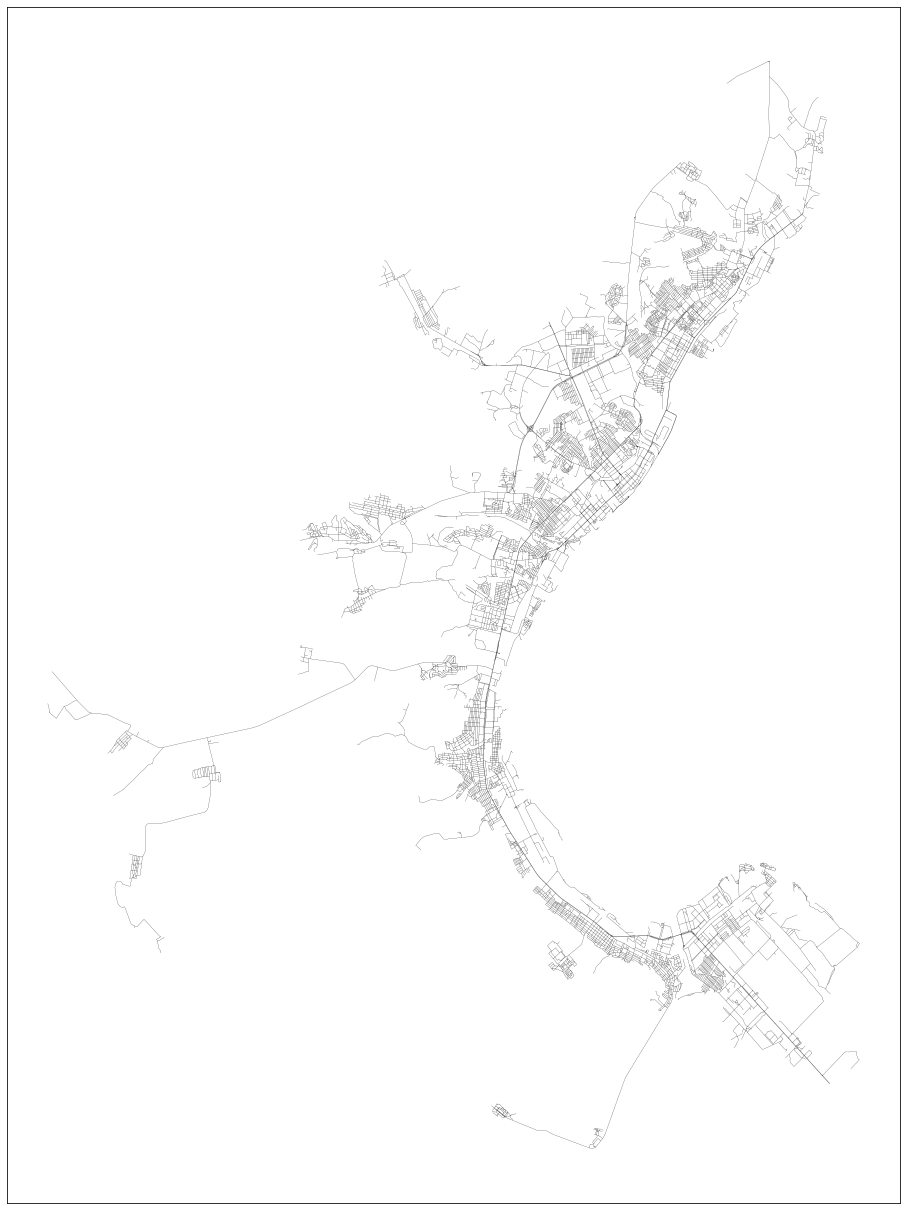

In [24]:
draw_graph(G,nodes)#'data/Volograd.png')

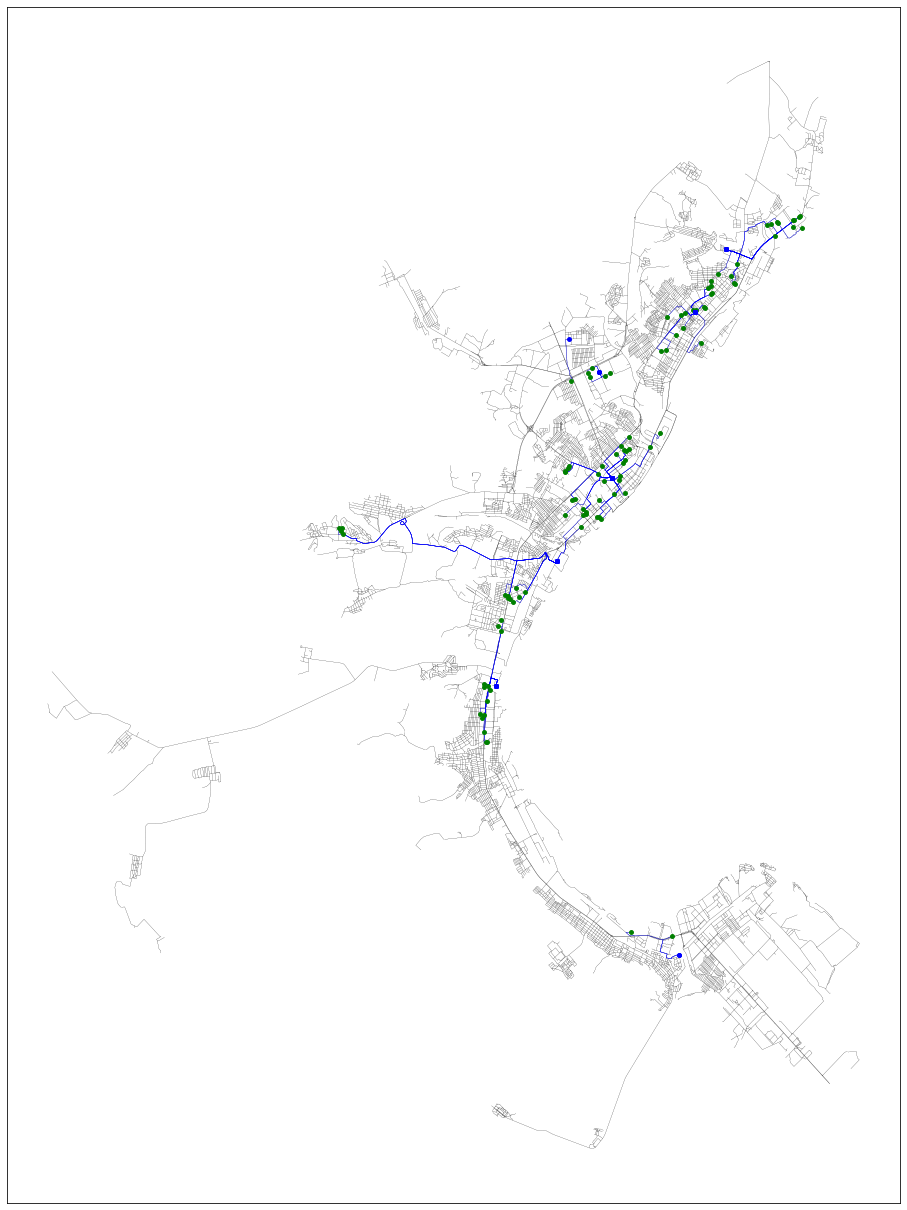

In [25]:
draw_ways_on_graph(G,nodes,min_oneways1)

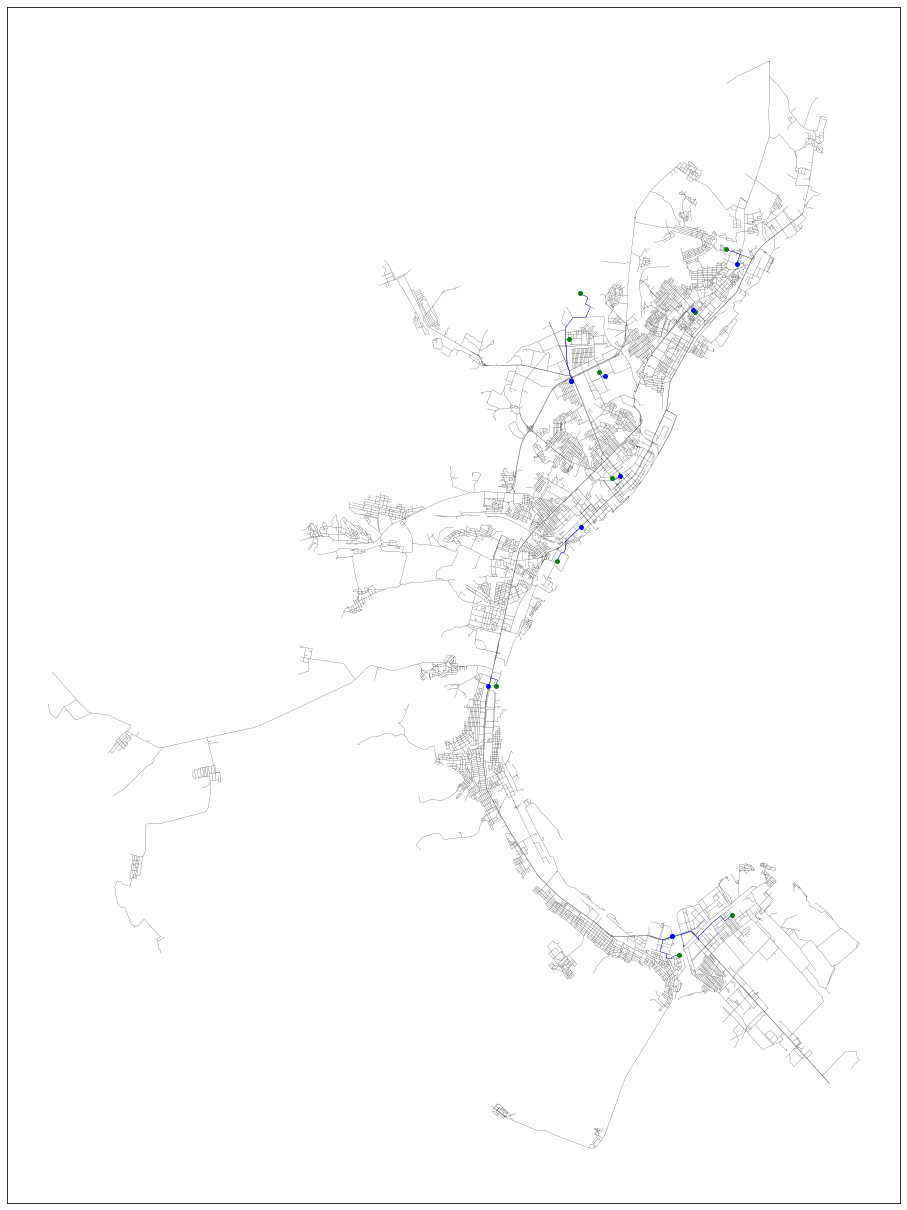

In [26]:
draw_ways_on_graph(G,nodes,min_oneways2)

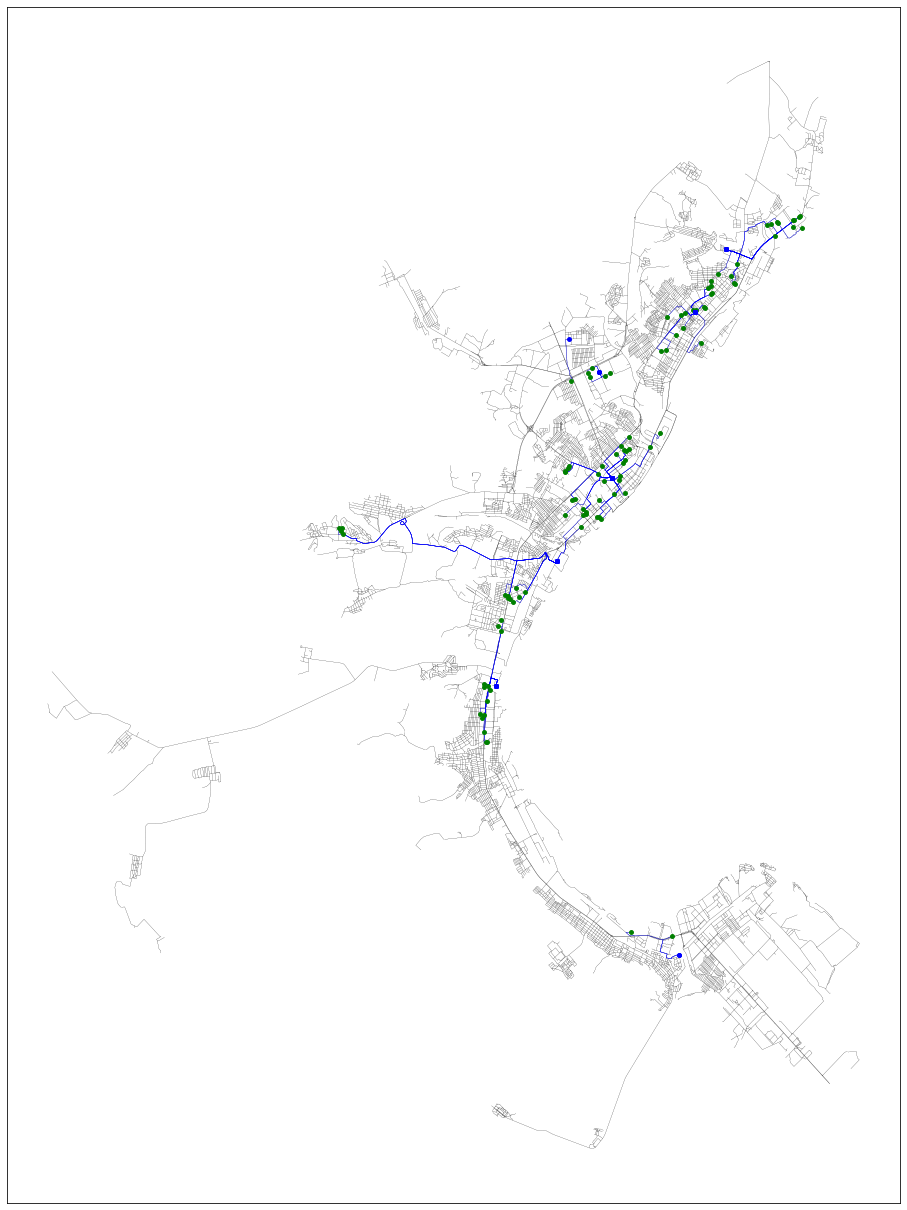

In [27]:
draw_ways_on_graph(G,nodes,min_ways_there_and_back)

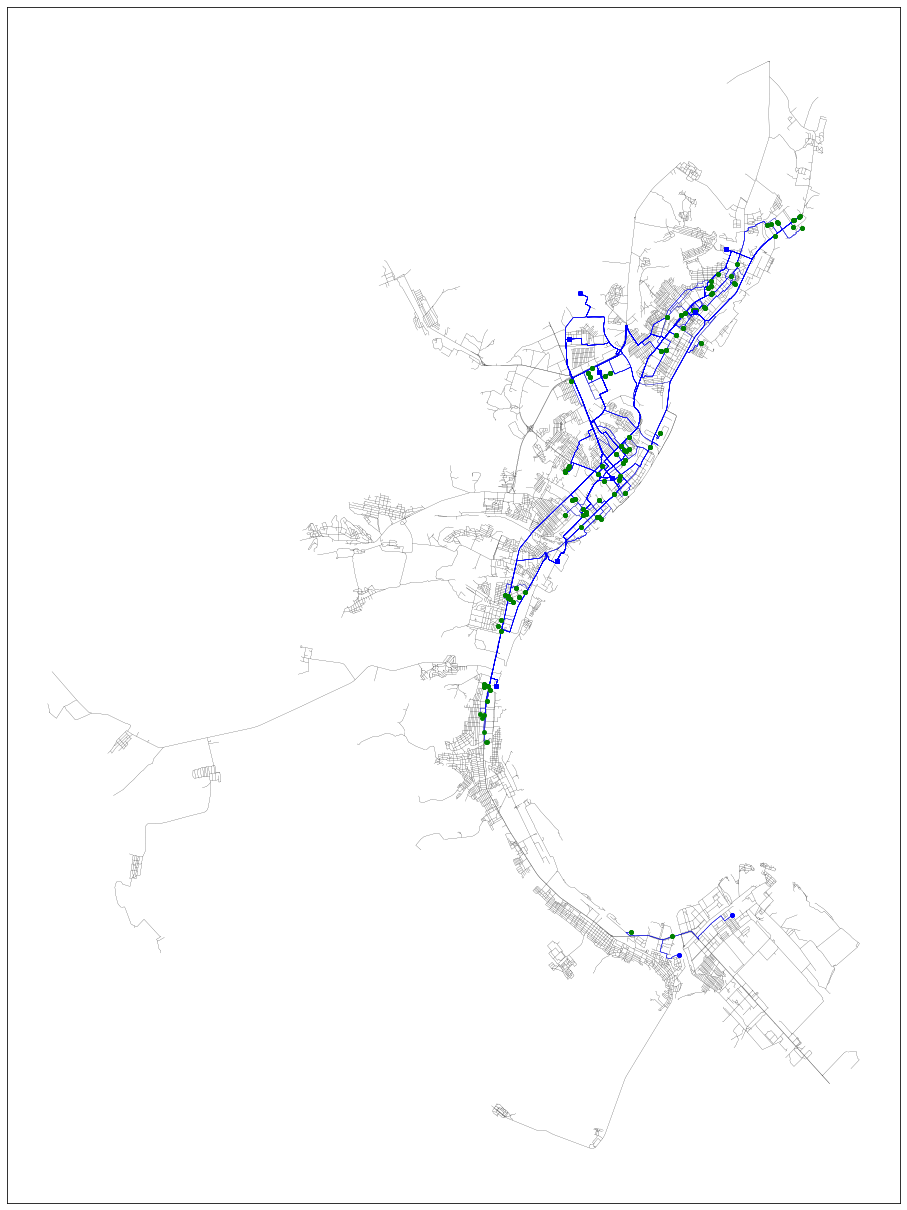

In [28]:
draw_ways_on_graph(G,nodes,near_ways1)

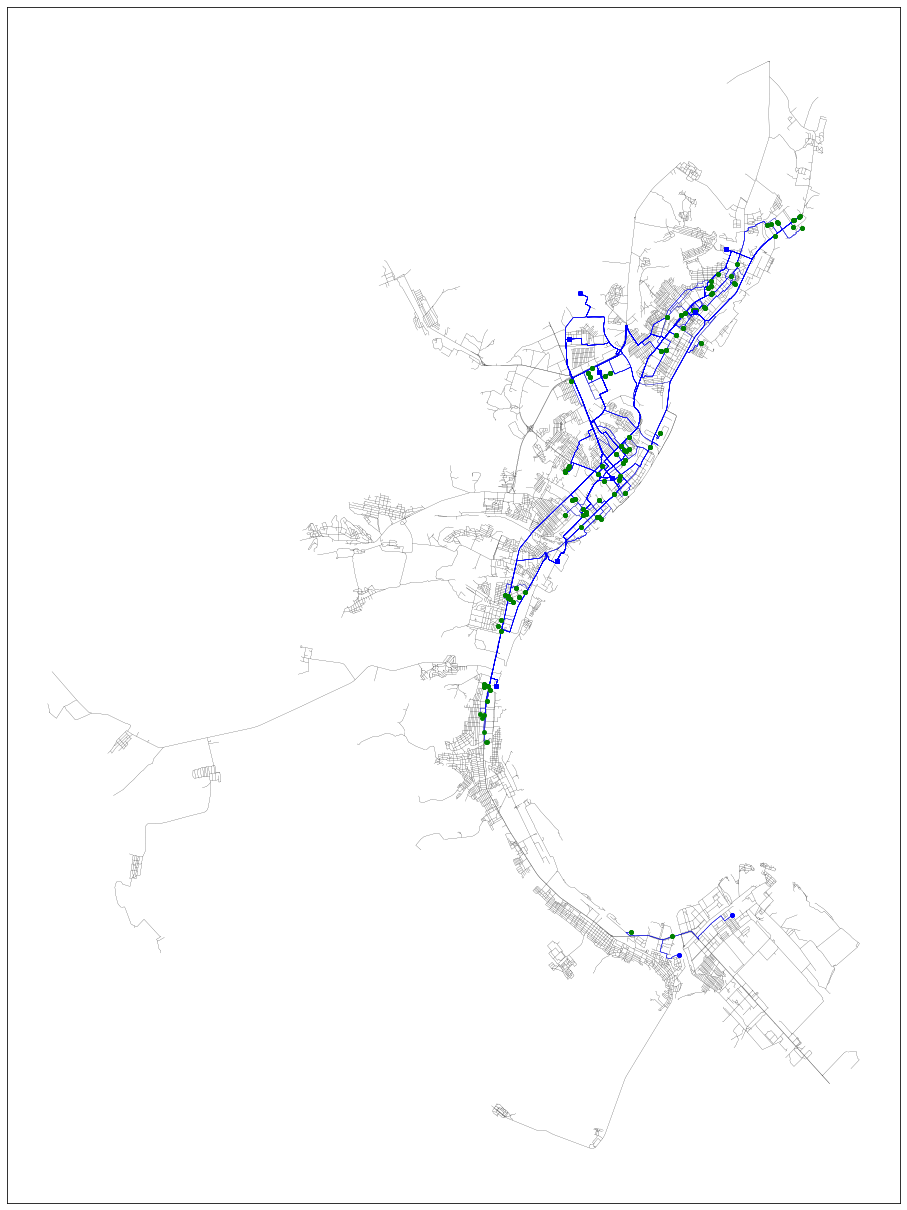

In [29]:
draw_ways_on_graph(G,nodes,near_ways2)

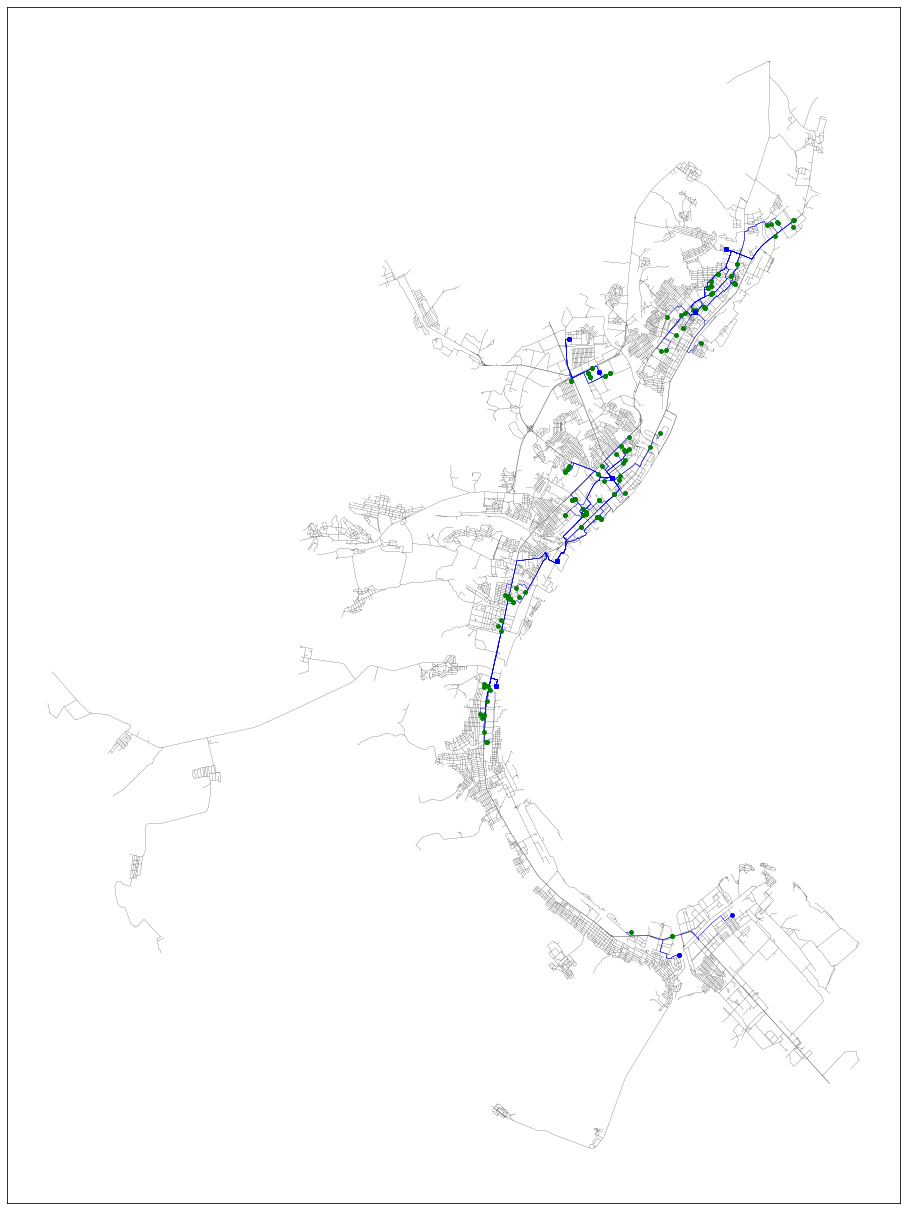

In [30]:
draw_ways_on_graph(G,nodes,near_ways_there_and_back)

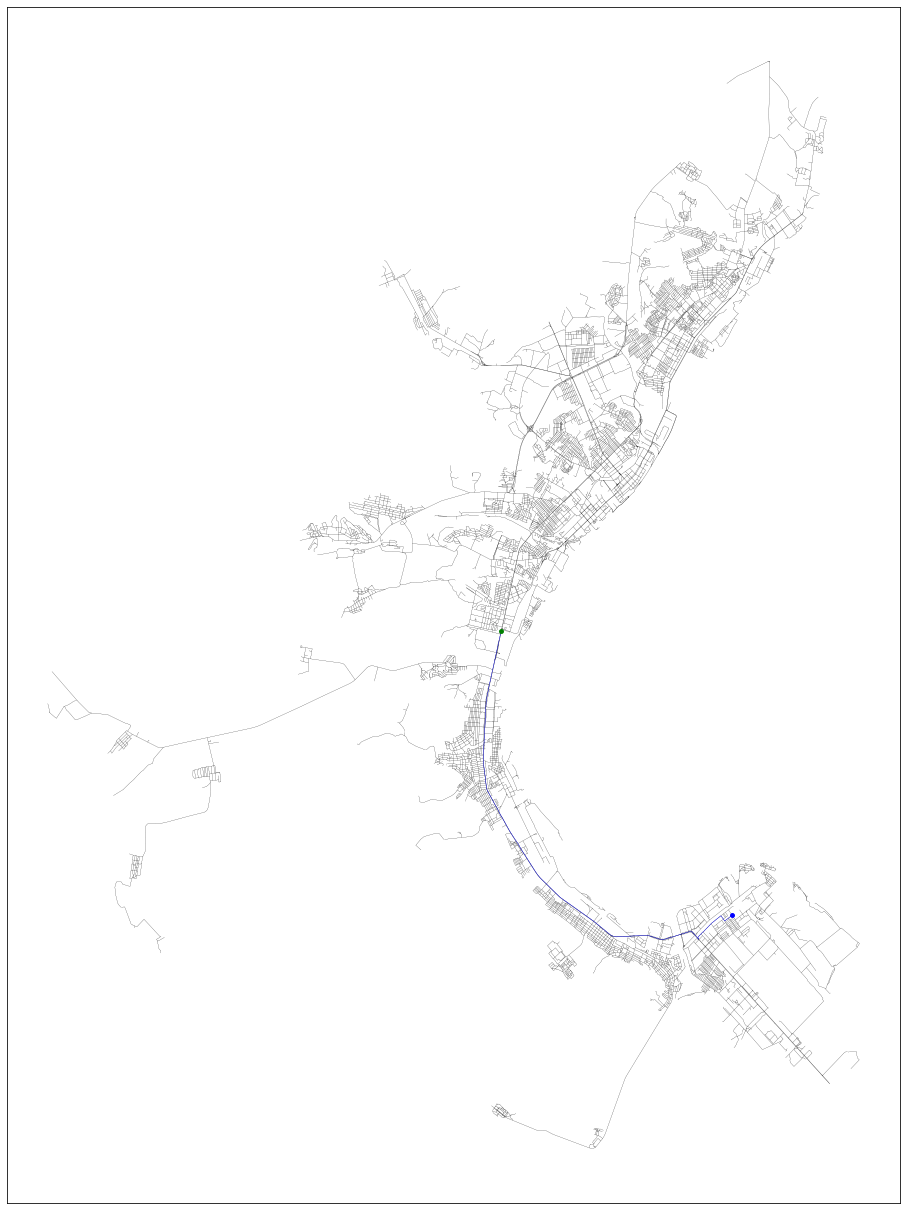

In [31]:
draw_ways_on_graph(G,nodes,minmax_way1)

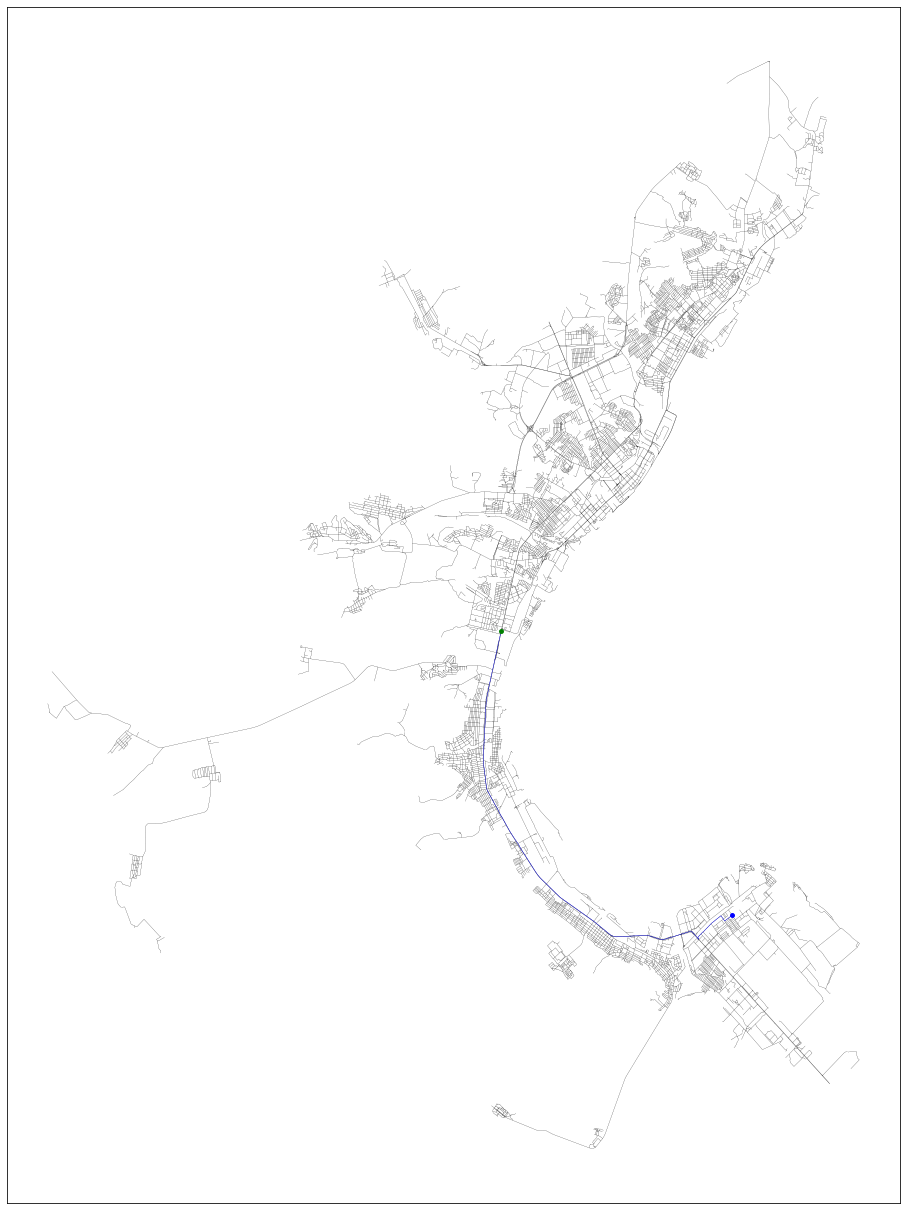

In [32]:
draw_ways_on_graph(G,nodes,minmax_way2)

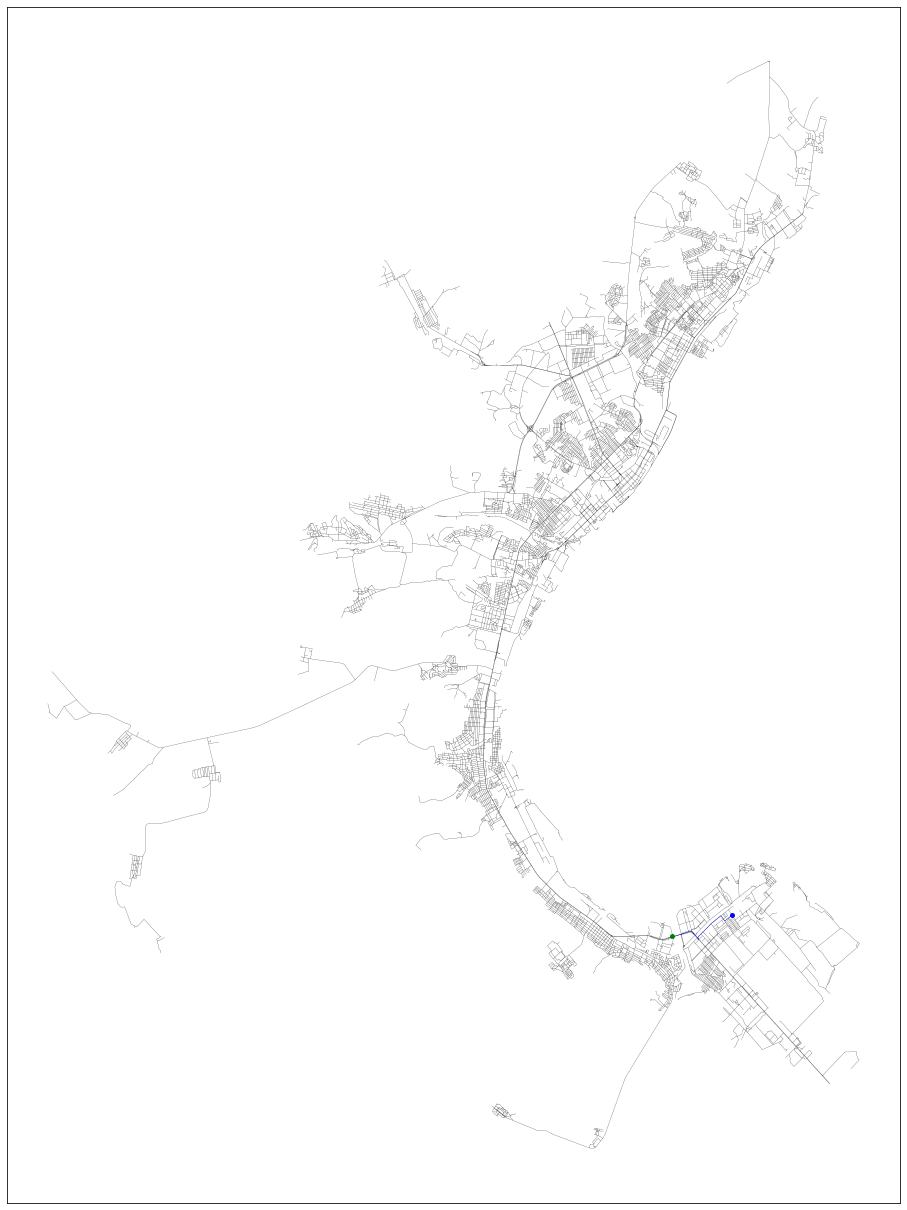

In [33]:
draw_ways_on_graph(G,nodes,minmax_way_there_and_back)

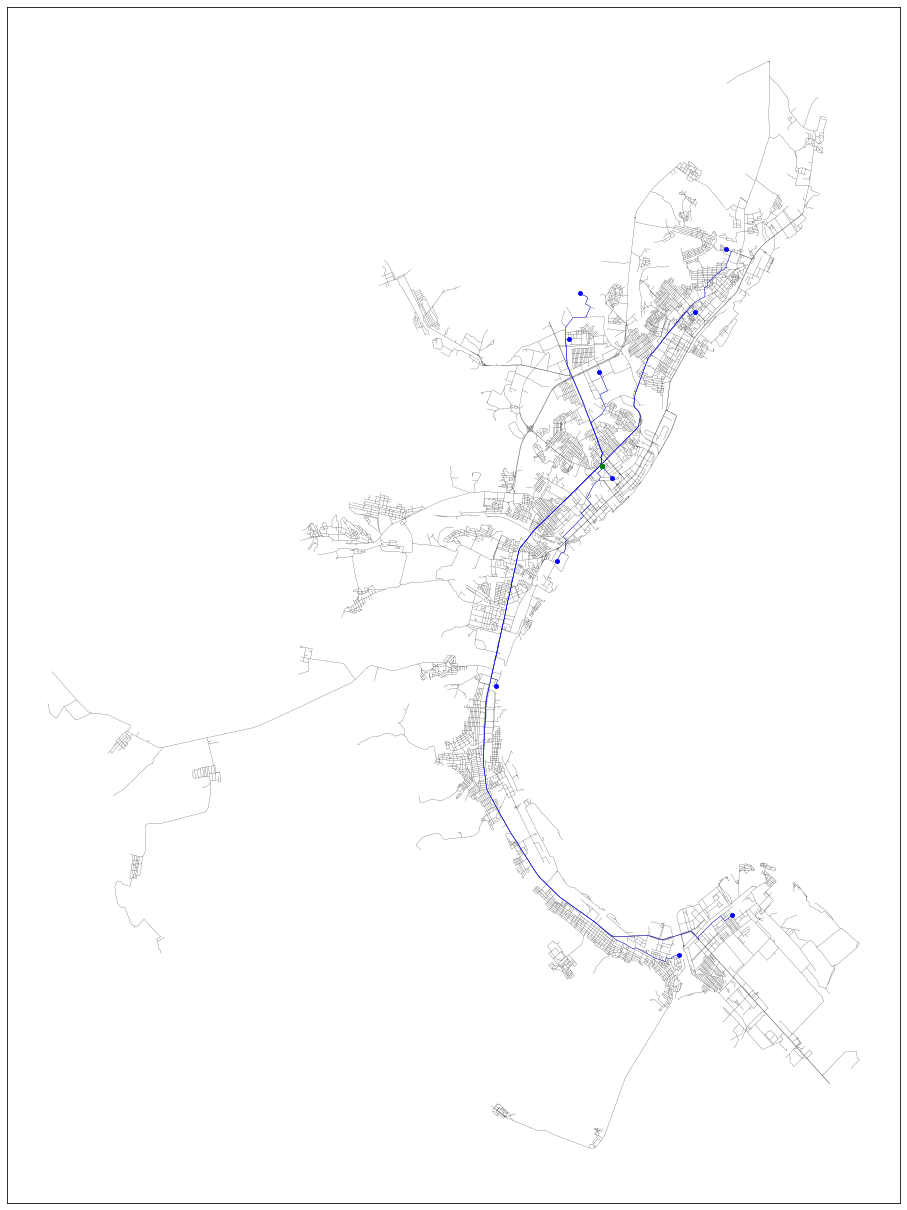

In [34]:
draw_ways_on_graph(G,nodes,min_distance_way)

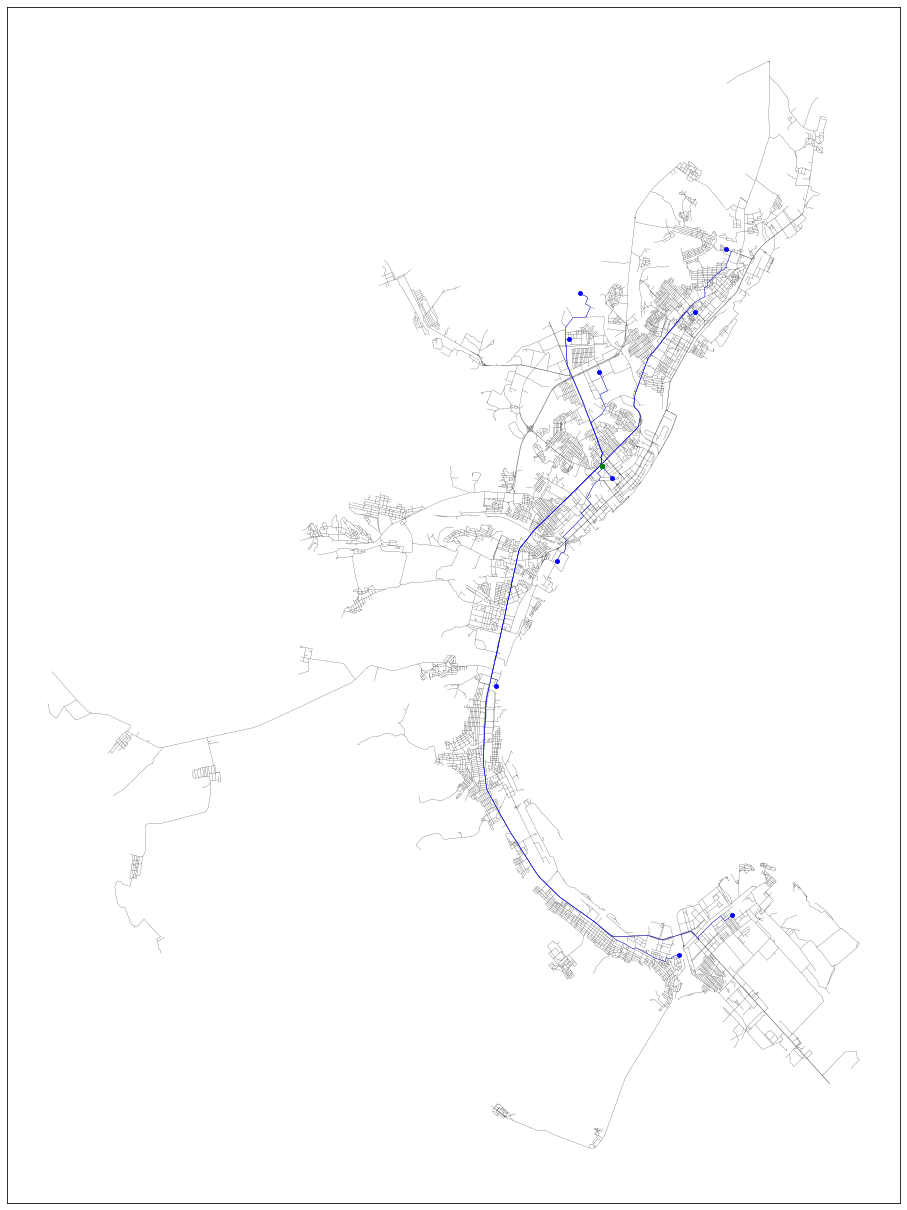

In [35]:
draw_ways_on_graph(G,nodes,min_weight_way)

In [7]:
def draw_ways(_map,ways_orig):
    if type(ways_orig) == dict:
        ways = [way['way'] for way in ways_orig.values()]
        if 'way_back' in ways_orig[list(ways_orig.keys())[0]].keys():
            ways += [way['way_back'] for way in ways_orig.values()]
    elif type(ways_orig) == list:
        ways = [way[3] for way in ways_orig]
        if len(ways_orig[0]) == 5:
            ways += [way[4] for way in ways_orig]
    ways = list(map(lambda x: (list(map(int,x))),ways))

    ox.plot_graph_routes(_map, ways)
 

In [10]:
_map = ox.graph_from_file('graph.osm',  simplify=False, retain_all=False)

AttributeError: 'NoneType' object has no attribute 'values'

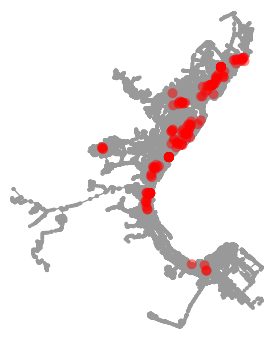

In [38]:
draw_ways(_map, min_oneways1)

In [ ]:
draw_ways(_map, min_oneways2)

In [ ]:
draw_ways(_map, min_ways_there_and_back)

In [ ]:
draw_ways(_map, near_ways1)

In [ ]:
draw_ways(_map, near_ways2)

In [ ]:
draw_ways(_map, near_ways_there_and_back)

In [ ]:
draw_ways(_map, minmax_way1)

In [ ]:
draw_ways(_map, minmax_way2)

In [ ]:
draw_ways(_map, minmax_way_there_and_back)

In [ ]:
draw_ways(_map,min_distance_way)

In [ ]:
draw_ways(_map,min_weight_way)

In [ ]:
#Часть для Вовы

In [12]:
def get_tree_and_sum(G, _from, target_list):
    tree = dijkstra(G, _from, target_list)
    filtered_tree = {k:v for k,v in tree.items() if v["weight"] != float('inf') and k in target_list}
    tree_sum = sum(list(map(lambda x: x['weight'], list(filtered_tree.values()))))
    
    edge_set = list()
    for target in filtered_tree:
        node_list = filtered_tree[target]['way']
        for node_number in range(len(node_list)-1):           
            new_edge = [node_list[node_number], node_list[node_number + 1]]
            if new_edge not in edge_set:
                edge_set.append(new_edge)
    tree_small_sum = sum(list(map(lambda x: G[x[0]][x[1]]['weight'], edge_set)))
    return filtered_tree, tree_sum, tree_small_sum

987.0891154931752 170.97638441637105


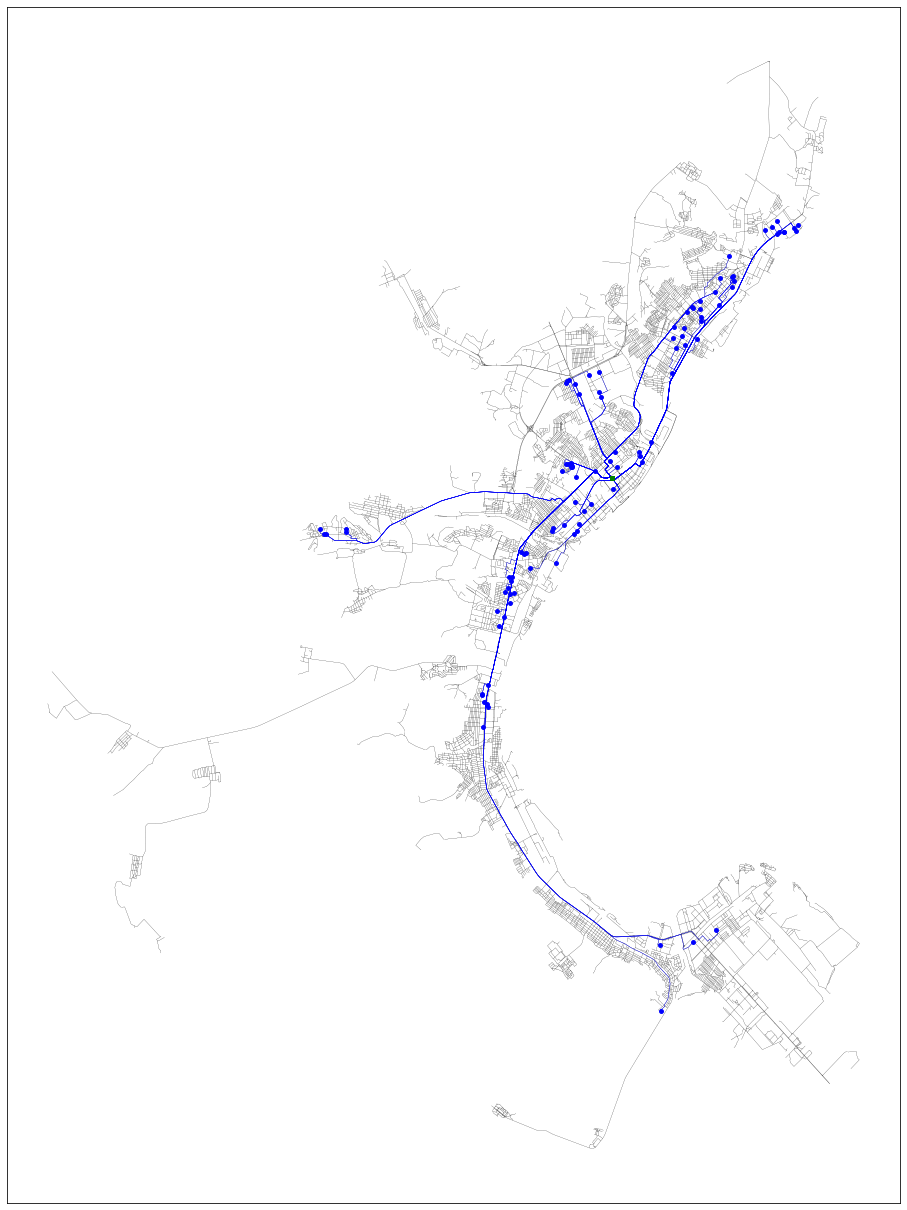

In [299]:
med = med_id[7]
some_houses = houses_id[400:500]
tree_from_med, tree_length, tree_min_length = get_tree_and_sum(G, str(med), some_houses)
draw_ways_on_graph(G, nodes, tree_from_med)
print(tree_length, tree_min_length)

In [260]:
import collections
def get_cluster_matrix():
    matrix = []
    for house_id in some_houses:
        pre_vector = dijkstra(G, house_id, some_houses)
        filtered_vector = {k:v for k,v in pre_vector.items() if v["weight"] != float('inf') and k in some_houses}
        sorted_vector = collections.OrderedDict(sorted(filtered_vector.items()))
        vector = list(map(lambda x: x['weight'], list(sorted_vector.values())))
        matrix.append(vector)
    return matrix

%time matrix = get_cluster_matrix()

Wall time: 1min 31s


In [261]:
def cluster_to_id_list(cluster_index, cluster_cash, list_id, count_of_values):
    cluster_indexes = [cluster_index]
    while len(list(filter(lambda x: x >= count_of_values, cluster_indexes))) > 0:
        cluster_to_open = list(filter(lambda x: x >= count_of_values, cluster_indexes))
        
        for cluster in cluster_to_open:
            cluster_indexes.remove(cluster)
            cluster_indexes.append(cluster_cash[int(cluster) - count_of_values, 0] )
            cluster_indexes.append(cluster_cash[int(cluster) - count_of_values, 1] )
            
    return list(map(lambda x: int(list_id[int(x)]), cluster_indexes))

In [262]:
def get_centroid_coords(cluster_nodes):
    x = sum(list(map(lambda x: x['x'], cluster_nodes))) / len(cluster_nodes)
    y = sum(list(map(lambda x: x['y'], cluster_nodes))) / len(cluster_nodes)
    return y, x

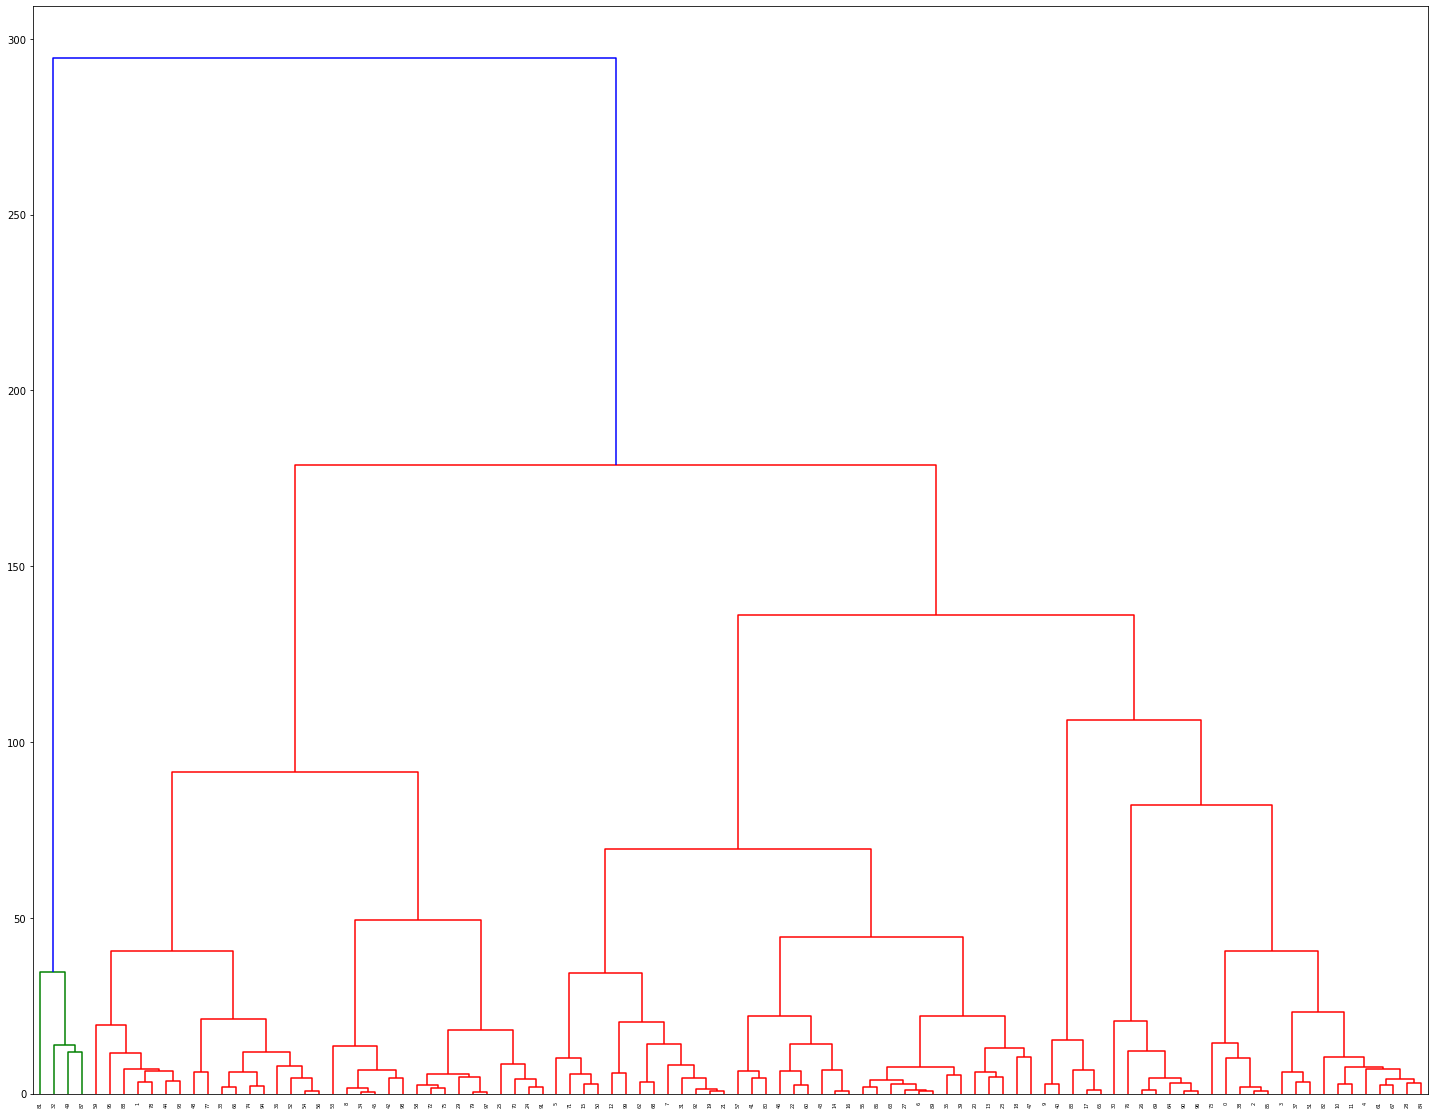

In [263]:
def get_cluster_cash_and_dendrogram():
    matrix_np = np.array(matrix)
    cluster_cash = linkage(matrix_np, 'complete')
    fig = plt.figure(figsize=(25, 20))
    dn = dendrogram(cluster_cash)
    return cluster_cash, dn

cluster_cash, dn = get_cluster_cash_and_dendrogram()

In [264]:
def get_cluster_info (cluster_index, cluster_cash, cluster_items_id, nodes_data,med_id, houses_id):    
    cluster_nodes = cluster_to_id_list(cluster_index, cluster_cash, cluster_items_id, len(cluster_cash) + 1)
    str_cluster_nodes = list(map(lambda x: str(x),cluster_nodes))
    list_with_coords = list(map(lambda x: {'x': float(nodes_data[str(x)][1]), 'y': float(nodes_data[str(x)][0])} ,cluster_nodes))
    centroid = get_centroid_coords(list_with_coords)
    centroid_id = find_nearest_node(centroid,houses_id,med_id)
    tree, tree_sum, tree_min_sum = get_tree_and_sum(G, str(centroid_id), str_cluster_nodes)
    return {'tree': tree, 'tree_sum':tree_sum, 'tree_min_sum':tree_min_sum, 'centroid_id':centroid_id, 'nodes': str_cluster_nodes}

In [265]:
def open_next_cluster(cluster_cash, clusters, count_of_values):
    cluster_to_open = max(clusters)
    clusters.remove(cluster_to_open)
    clusters.append(cluster_cash[int(cluster_to_open) - count_of_values, 0] )
    clusters.append(cluster_cash[int(cluster_to_open) - count_of_values, 1] )
    return clusters

In [266]:
def find_nearest_node(coords_node, houses_id, med_id):
    buffer = []
    min_dist = float('inf')
    for node_id  in G.nodes():
        check_min = (nodes[node_id][0] - coords_node[0])**2 + (nodes[node_id][1] - coords_node[1])**2
        if check_min < min_dist and node_id not in houses_id and houses_id not in med_id:
            min_dist = check_min
            buffer.append(node_id)
            if len(buffer) > len(houses_id) + len(med_id) + 5:
                buffer = buffer[2:]
    return(buffer[-1])        

In [267]:

def get_clusters_info_task():
    clusters = [int(cluster_cash[-1,0]), int(cluster_cash[-1,1])]
    clusters_info_2 = list(map(lambda x: get_cluster_info(x, cluster_cash, some_houses, nodes, med_id, some_houses), clusters))
    clusters = open_next_cluster(cluster_cash, clusters, len(some_houses))
    clusters_info_3 = list(map(lambda x: get_cluster_info(x, cluster_cash, some_houses, nodes, med_id, houses_id), clusters))
    clusters = open_next_cluster(cluster_cash, clusters, len(some_houses))
    clusters = open_next_cluster(cluster_cash, clusters, len(some_houses))
    clusters_info_5 = list(map(lambda x: get_cluster_info(x, cluster_cash, some_houses, nodes, med_id, houses_id), clusters))
    return clusters_info_2, clusters_info_3,clusters_info_5

%time clusters_info_2, clusters_info_3,clusters_info_5 = get_clusters_info_task()

Wall time: 2.83 s


In [295]:
def draw_clusters(G,nodes, clusters_info, filename=''):
    colors = ['b','g','r','#FF00FF','c']
    for cluster_number in range(len(clusters_info)):
        is_draw = cluster_number == 0
        save_filename = '' if cluster_number != len(clusters_info) - 1 else filename 
        draw_ways_on_graph(G,nodes, clusters_info[cluster_number]['tree'], filename=save_filename, draw_network=is_draw, way_color=colors[cluster_number],node_size=8)

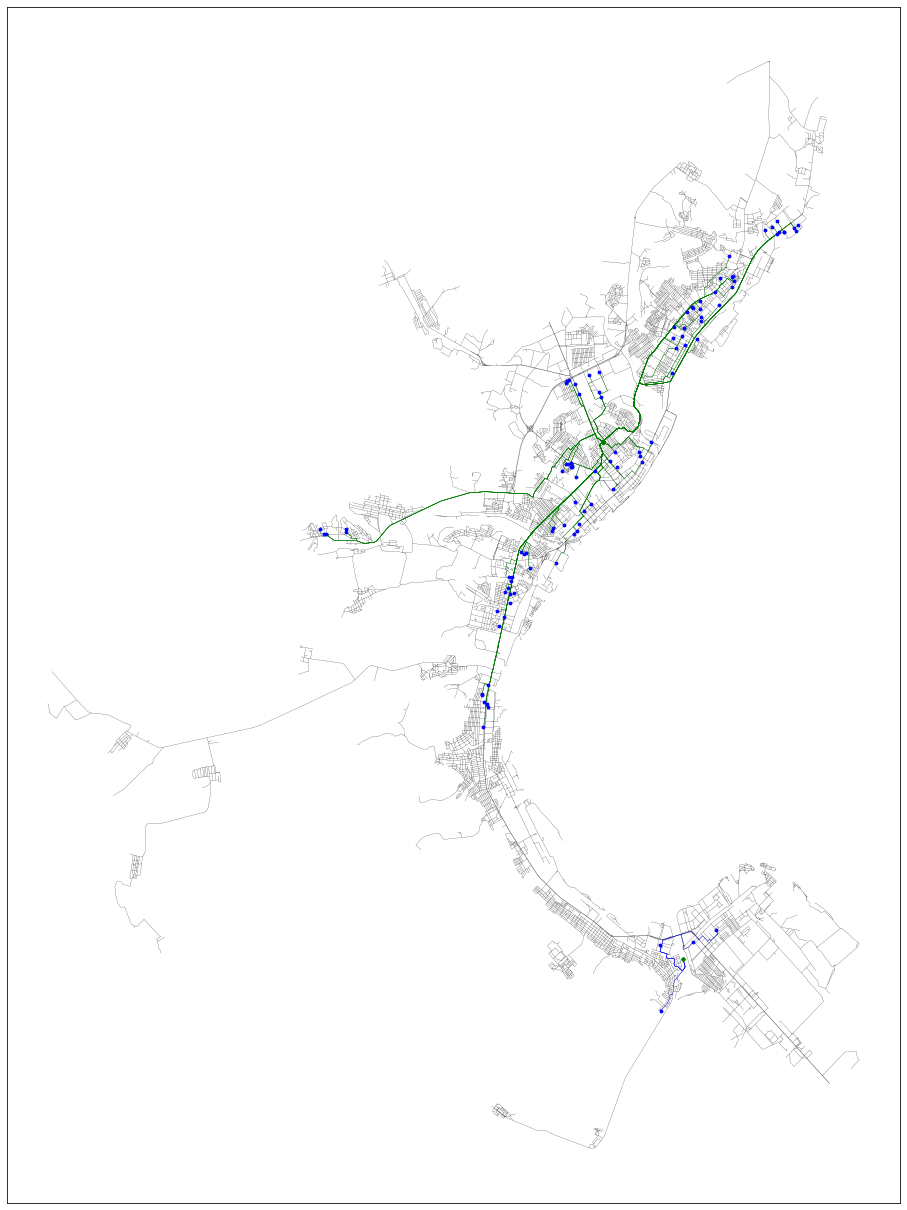

In [300]:
draw_clusters(G,nodes,clusters_info_2)

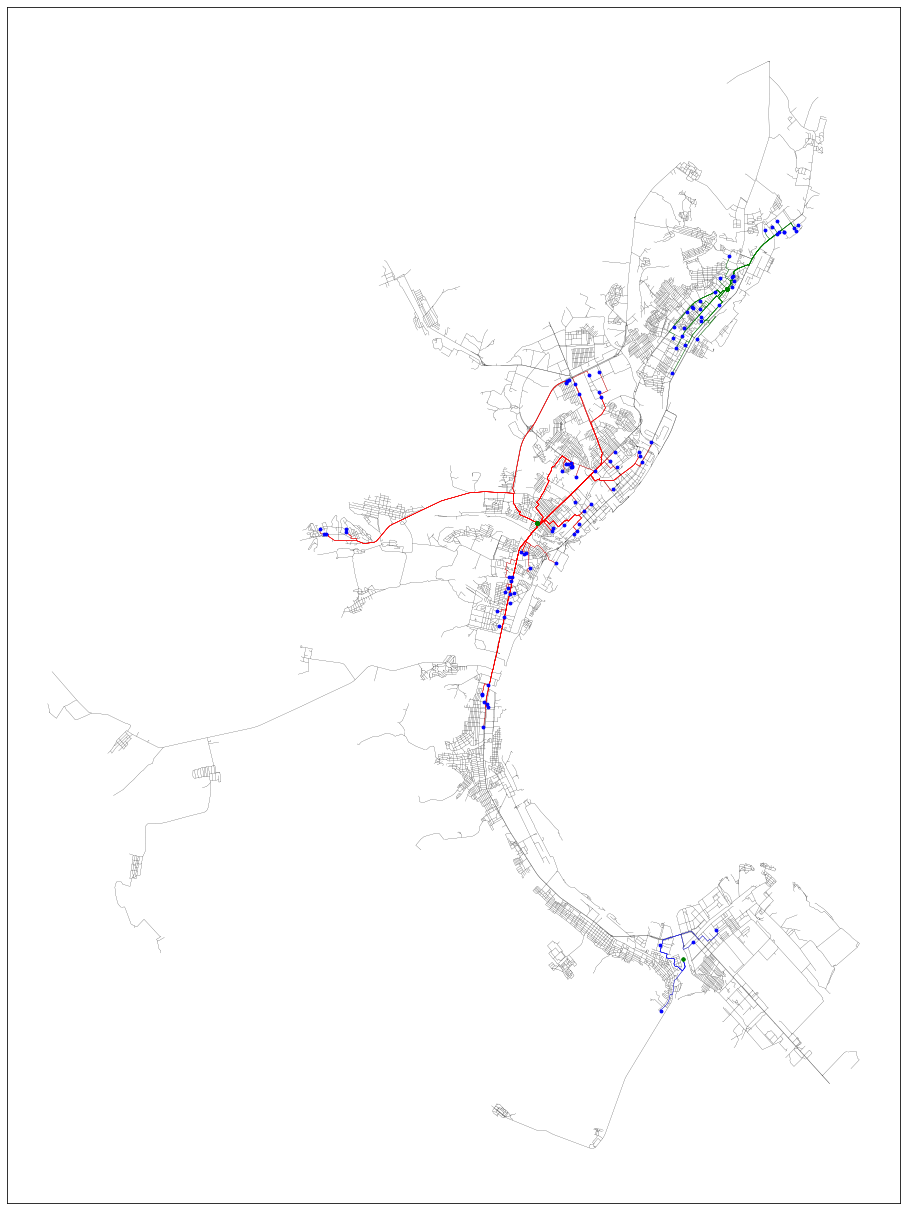

In [305]:
draw_clusters(G,nodes,clusters_info_3)

Wall time: 1.23 s


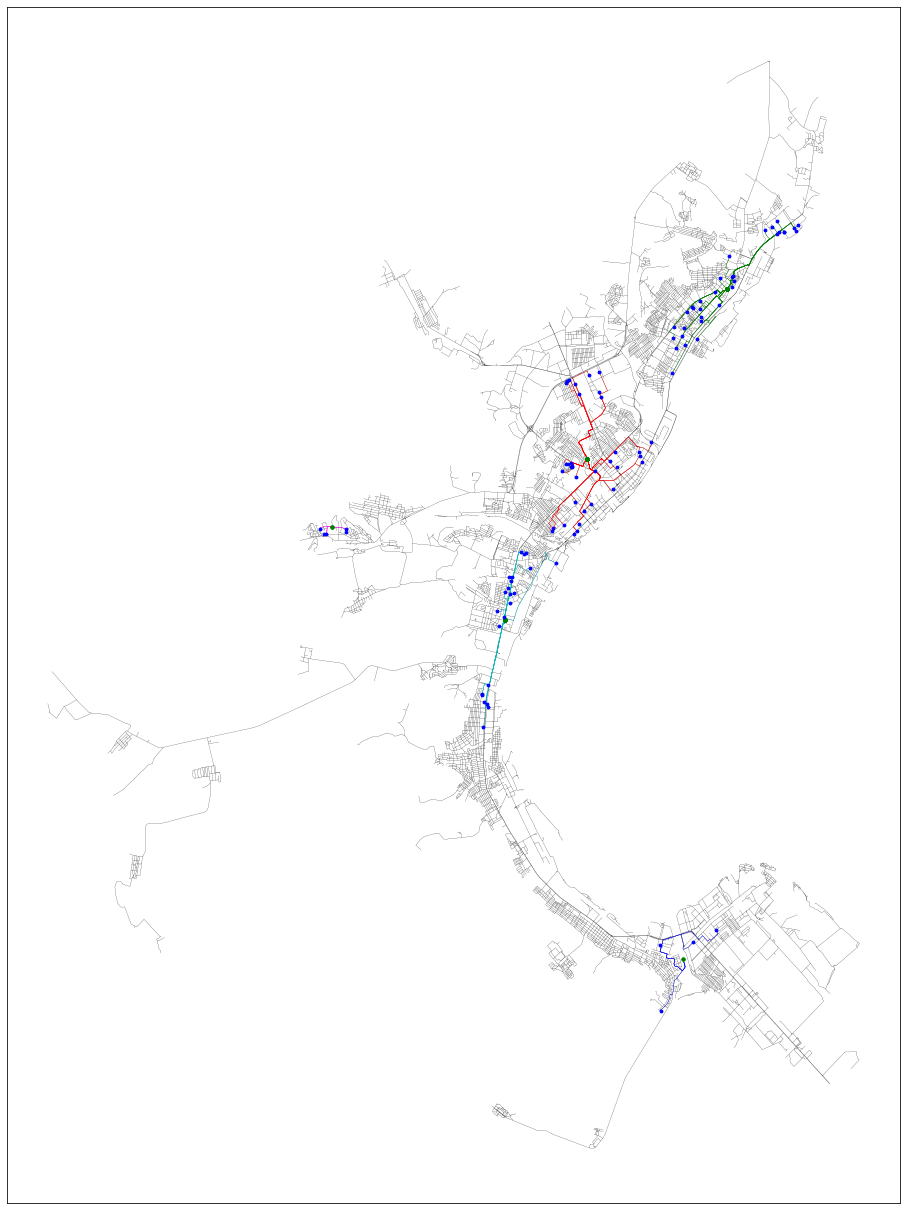

In [309]:
%time draw_clusters(G,nodes,clusters_info_5)

In [286]:
def count_centroids_tree_from_cluster(clusters_info, med_id):
    centroids = [str(cluster_info['centroid_id']) for cluster_info in clusters_info]
    return get_tree_and_sum(G, str(med_id), centroids)

89.95576956109045 70.37418925922454


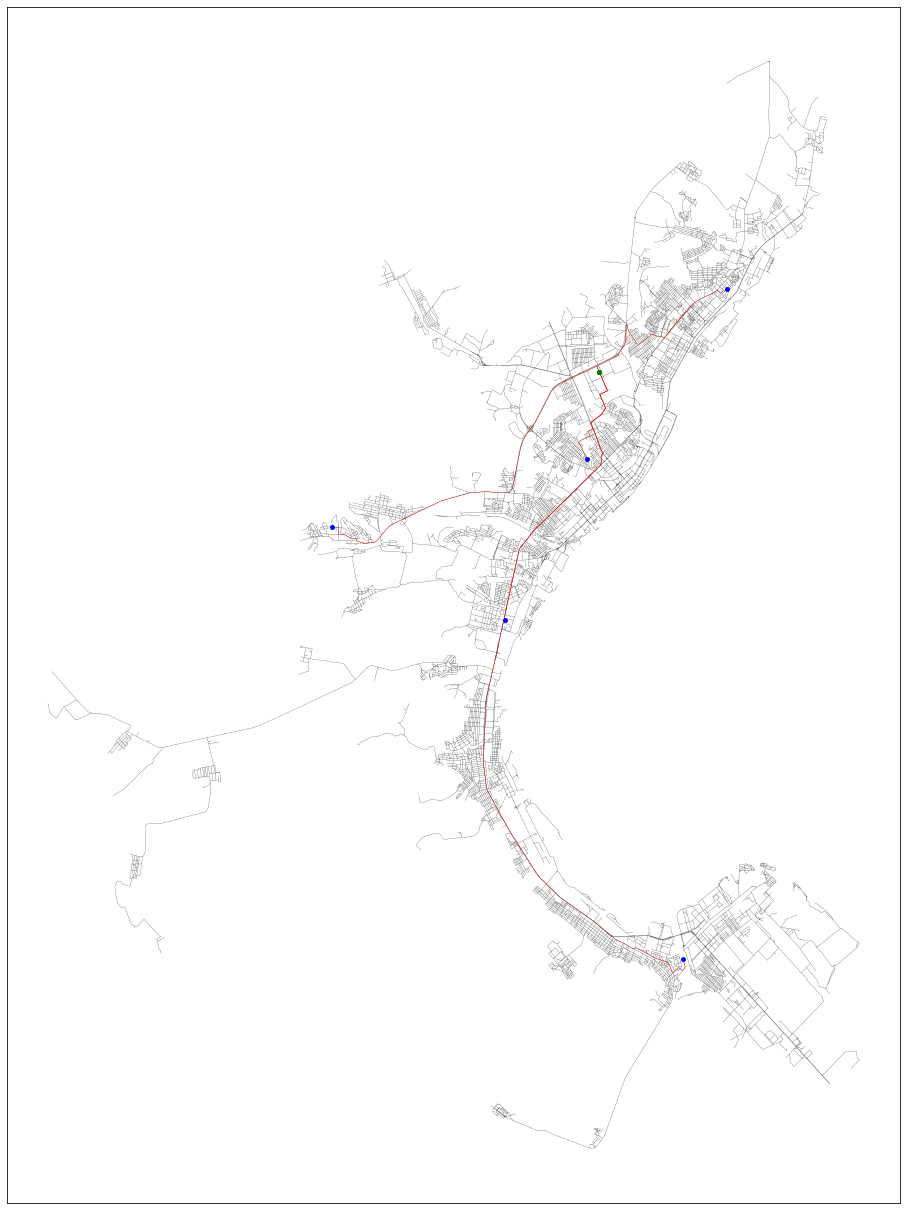

In [308]:
tree_to_centroids_5, tree_to_centroids_sum_5, tree_to_centroids_min_sum_5 = count_centroids_tree_from_cluster(clusters_info_5, med_id[5])
draw_ways_on_graph(G, nodes, tree_to_centroids_5, way_color='r')
print(tree_to_centroids_sum_5, tree_to_centroids_min_sum_5)

59.21462308797711 48.85541867225231


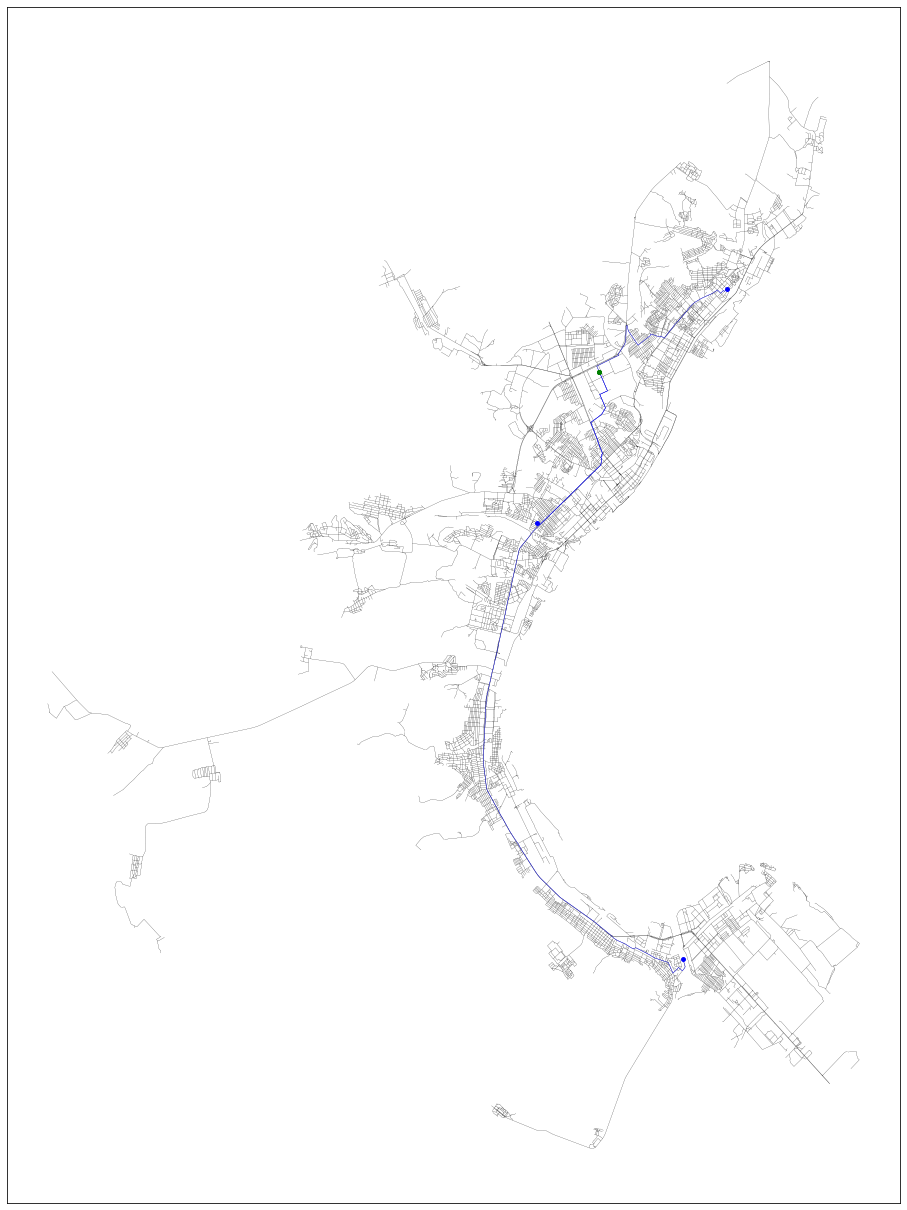

In [307]:
tree_to_centroids_3, tree_to_centroids_sum_3, tree_to_centroids_min_sum_3 = count_centroids_tree_from_cluster(clusters_info_3, med_id[5])
draw_ways_on_graph(G, nodes, tree_to_centroids_3)
print(tree_to_centroids_sum_3, tree_to_centroids_min_sum_3)

43.31596328141416 39.59613055628447


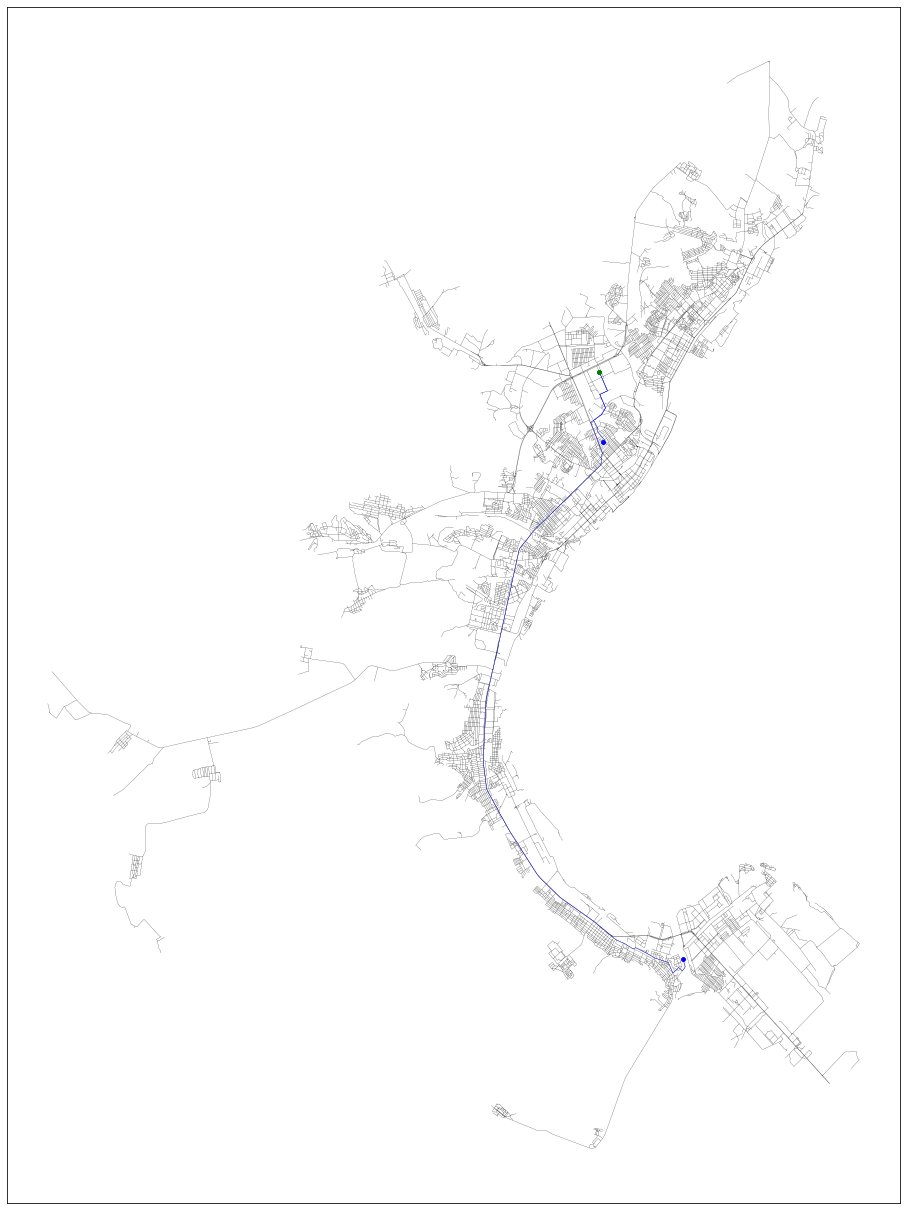

In [306]:
tree_to_centroids_2, tree_to_centroids_sum_2, tree_to_centroids_min_sum_2 = count_centroids_tree_from_cluster(clusters_info_2, med_id[5])
draw_ways_on_graph(G, nodes, tree_to_centroids_2)
print(tree_to_centroids_sum_2, tree_to_centroids_min_sum_2)

In [290]:
def clusters_info_to_routes(clusters_info):
    routes_clusters_str = reduce(lambda x,y: x + y, list(map(lambda x: [v['way'] for k,v in x['tree'].items()], clusters_info)))
    return list(map(lambda x: list(map(lambda y: int(y), x)), routes_clusters_str))

def cluster_info_to_csv(clusters_info):
    data = clusters_info_to_routes(clusters_info)
    for cluster in clusters_info:
        tree_data = [cluster['tree_sum'], cluster['tree_min_sum']]
        data.append(tree_data)
        data.append([cluster['centroid_id']])
        data.append(cluster["nodes"])
    return data

def dijkstra_to_routes(res):
    routes_int = [res[key]['way'] for key in res]
    return list(map(lambda x: [int(value) for value in x], routes_int))

def tree_info_to_csv(tree, tree_sum, tree_min_sum):
    data = dijkstra_to_routes(tree)
    data.append([tree_sum])
    data.append([tree_min_sum])
    return data

def cluster_cash_to_csv(cluster_cash, count_of_items):
    data = cluster_cash.copy()
    for i in range(len(cluster_cash)):
        if cluster_cash[i,0] < count_of_items:
            data[i,0] = some_houses[int(data[i,0])]
        if cluster_cash[i,1] < count_of_items:
            data[i,1] = some_houses[int(data[i,1])]
    return data

In [291]:
with open('clusters.csv', "w", newline="") as file:
    data = cluster_cash_to_csv(cluster_cash, len(some_houses))
    writer = csv.writer(file)
    writer.writerows(data)

with open('tree_from_med_to_houses.csv', "w", newline="") as file:
    data = tree_info_to_csv(tree_from_med, tree_length, tree_min_length)
    writer = csv.writer(file)
    writer.writerows(data)
    
with open('tree_from_med_to_centroids.csv', "w", newline="") as file:
    data =  tree_info_to_csv(tree_to_centroids_2, tree_to_centroids_sum_2, tree_to_centroids_min_sum_2)
    data = data + tree_info_to_csv(tree_to_centroids_3, tree_to_centroids_sum_3, tree_to_centroids_min_sum_3)
    data = data + tree_info_to_csv(tree_to_centroids_5, tree_to_centroids_sum_5, tree_to_centroids_min_sum_5)
    writer = csv.writer(file)
    writer.writerows(data)

with open('clusters_tree_5.csv', "w", newline="") as file:
    data = cluster_info_to_csv(clusters_info_5)        
    writer = csv.writer(file)
    writer.writerows(data)

with open('clusters_tree_3.csv', "w", newline="") as file:
    data = cluster_info_to_csv(clusters_info_3)        
    writer = csv.writer(file)
    writer.writerows(data)
    
with open('clusters_tree_2.csv', "w", newline="") as file:
    data = cluster_info_to_csv(clusters_info_2)        
    writer = csv.writer(file)
    writer.writerows(data)